# 1. Data Science Process - Define the Problem
- We are a Data Science team in Propnex Pte Ltd, a real estate company. 
- We have been with tasked with analysing the Ames Housing Dataset that is available on [Kaggle](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge) and finding the key predictors that influence the Sales Price of houses in Ames city. 
- We will be creating a regression model that will help us make predictions with the best R<sup>2</sup> score.
- Through this analysis, we will make recommendations to homeowners on improving their property’s value and to home buyers on which features will command high prices.

### Criteria for Evaluation
Problem Statement
- Is it clear what the student plans to do?
- What type of model will be developed?
- How will success be evaluated?
- Is the scope of the project appropriate?
- Is it clear who cares about this or why this is important to investigate?
- Does the student consider the audience and the primary and secondary stakeholders?

# 2. Data Science Process - Gather data

### Criteria for Evaluation
Data Cleaning and EDA
- Are missing values imputed appropriately?
- Are distributions examined and described?
- Are outliers identified and addressed?
- Are appropriate summary statistics provided?
- Are steps taken during data cleaning and EDA framed appropriately?
- Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?

In [2000]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
import sklearn.preprocessing as skpp

%matplotlib inline

In [2001]:
df_train = pd.read_csv("./datasets/train.csv")

In [2002]:
# na_filter = False will read the "NA" values in the csv file in its original - "NA" instead of converting it to "nan" 
# "NA" means Not Available/Applicable and should not be changed to nan as it is not a missing value
df_train_nafilter_false = pd.read_csv("./datasets/train.csv", na_filter=False)

In [2003]:
df_test = pd.read_csv("./datasets/test.csv")

In [2004]:
df_test_nafilter_false = pd.read_csv("./datasets/test.csv", na_filter=False)

In [2005]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [2006]:
df_train.shape

(2051, 81)

In [2007]:
df_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [2008]:
df_train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [2009]:
df_train.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [2010]:
df_train.describe(include = 'all')

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
count,2051.000000,2.051000e+03,2051.000000,2051,1721.000000,2051.000000,2051,140,2051,2051,...,2051.000000,2051.000000,9,400,65,2051.000000,2051.000000,2051.000000,2051,2051.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,...,NaN,NaN,4,4,5,NaN,NaN,NaN,9,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,...,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,NaN
freq,NaN,NaN,NaN,1598,NaN,NaN,2044,85,1295,1843,...,NaN,NaN,4,227,56,NaN,NaN,NaN,1781,NaN
mean,1474.033642,7.135900e+08,57.008776,NaN,69.055200,10065.208191,NaN,NaN,NaN,NaN,...,16.511458,2.397855,NaN,NaN,NaN,51.574354,6.219893,2007.775719,NaN,181469.701609
std,843.980841,1.886918e+08,42.824223,NaN,23.260653,6742.488909,NaN,NaN,NaN,NaN,...,57.374204,37.782570,NaN,NaN,NaN,573.393985,2.744736,1.312014,NaN,79258.659352
min,1.000000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,12789.000000
25%,753.500000,5.284581e+08,20.000000,NaN,58.000000,7500.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,129825.000000
50%,1486.000000,5.354532e+08,50.000000,NaN,68.000000,9430.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,162500.000000
75%,2198.000000,9.071801e+08,70.000000,NaN,80.000000,11513.500000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,214000.000000


In [2011]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [2012]:
df_train.iloc[:, :20].head() # Look at first 20 columns of data

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8


In [2013]:
df_train.iloc[:, :20].dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
Lot Area          int64
Street           object
Alley            object
Lot Shape        object
Land Contour     object
Utilities        object
Lot Config       object
Land Slope       object
Neighborhood     object
Condition 1      object
Condition 2      object
Bldg Type        object
House Style      object
Overall Qual      int64
Overall Cond      int64
dtype: object

In [2014]:
df_train.iloc[:, :20].describe(include="all")

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond
count,2051.000000,2.051000e+03,2051.000000,2051,1721.000000,2051.000000,2051,140,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051.000000,2051.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,3,5,3,28,9,8,5,8,NaN,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN
freq,NaN,NaN,NaN,1598,NaN,NaN,2044,85,1295,1843,2049,1503,1953,310,1767,2025,1700,1059,NaN,NaN
mean,1474.033642,7.135900e+08,57.008776,NaN,69.055200,10065.208191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.112140,5.562165
std,843.980841,1.886918e+08,42.824223,NaN,23.260653,6742.488909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.426271,1.104497
min,1.000000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,753.500000,5.284581e+08,20.000000,NaN,58.000000,7500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000
50%,1486.000000,5.354532e+08,50.000000,NaN,68.000000,9430.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000
75%,2198.000000,9.071801e+08,70.000000,NaN,80.000000,11513.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,6.000000


In [2015]:
df_train.iloc[:, 20:40].head() # Look at next 20 columns of data

,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
0,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0
1,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0
2,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0
3,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0
4,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0


In [2016]:
df_train.iloc[:, 20:40].dtypes

Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
dtype: object

In [2017]:
df_train.iloc[:, 20:40].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      2051 non-null   int64  
 1   Year Remod/Add  2051 non-null   int64  
 2   Roof Style      2051 non-null   object 
 3   Roof Matl       2051 non-null   object 
 4   Exterior 1st    2051 non-null   object 
 5   Exterior 2nd    2051 non-null   object 
 6   Mas Vnr Type    2029 non-null   object 
 7   Mas Vnr Area    2029 non-null   float64
 8   Exter Qual      2051 non-null   object 
 9   Exter Cond      2051 non-null   object 
 10  Foundation      2051 non-null   object 
 11  Bsmt Qual       1996 non-null   object 
 12  Bsmt Cond       1996 non-null   object 
 13  Bsmt Exposure   1993 non-null   object 
 14  BsmtFin Type 1  1996 non-null   object 
 15  BsmtFin SF 1    2050 non-null   float64
 16  BsmtFin Type 2  1995 non-null   object 
 17  BsmtFin SF 2    2050 non-null   f

In [2018]:
df_train.iloc[:, 20:40].describe(include="all")

,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
count,2051.000000,2051.000000,2051,2051,2051,2051,2029,2029.000000,2051,2051,2051,1996,1996,1993,1996,2050.000000,1995,2050.000000,2050.000000,2050.000000
unique,NaN,NaN,6,6,15,15,4,NaN,4,5,6,5,5,4,6,NaN,6,NaN,NaN,NaN
top,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN
freq,NaN,NaN,1619,2025,724,721,1218,NaN,1247,1778,926,887,1834,1339,615,NaN,1749,NaN,NaN,NaN
mean,1971.708922,1984.190151,NaN,NaN,NaN,NaN,NaN,99.695909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.300488,NaN,47.959024,567.728293,1057.987805
std,30.177889,21.036250,NaN,NaN,NaN,NaN,NaN,174.963129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461.204124,NaN,165.000901,444.954786,449.410704
min,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000
25%,1953.500000,1964.500000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,220.000000,793.000000
50%,1974.000000,1993.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,368.000000,NaN,0.000000,474.500000,994.500000
75%,2001.000000,2004.000000,NaN,NaN,NaN,NaN,NaN,161.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,733.750000,NaN,0.000000,811.000000,1318.750000


In [2019]:
df_train.iloc[:, 40:60].head() # Look at next 20 columns of data

,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type
0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd
1,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd
2,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd
3,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn
4,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd


In [2020]:
df_train.iloc[:, 40:60].dtypes

Heating             object
Heating QC          object
Central Air         object
Electrical          object
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
Kitchen Qual        object
TotRms AbvGrd        int64
Functional          object
Fireplaces           int64
Fireplace Qu        object
Garage Type         object
dtype: object

In [2021]:
df_train.iloc[:, 40:60].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Heating          2051 non-null   object 
 1   Heating QC       2051 non-null   object 
 2   Central Air      2051 non-null   object 
 3   Electrical       2051 non-null   object 
 4   1st Flr SF       2051 non-null   int64  
 5   2nd Flr SF       2051 non-null   int64  
 6   Low Qual Fin SF  2051 non-null   int64  
 7   Gr Liv Area      2051 non-null   int64  
 8   Bsmt Full Bath   2049 non-null   float64
 9   Bsmt Half Bath   2049 non-null   float64
 10  Full Bath        2051 non-null   int64  
 11  Half Bath        2051 non-null   int64  
 12  Bedroom AbvGr    2051 non-null   int64  
 13  Kitchen AbvGr    2051 non-null   int64  
 14  Kitchen Qual     2051 non-null   object 
 15  TotRms AbvGrd    2051 non-null   int64  
 16  Functional       2051 non-null   object 
 17  Fireplaces    

In [2022]:
df_train.iloc[:, 40:60].describe(include="all")

,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type
count,2051,2051,2051,2051,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051,2051.000000,2051,2051.000000,1051,1938
unique,5,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,8,NaN,5,6
top,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd
freq,2018,1065,1910,1868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1047,NaN,1915,NaN,523,1213
mean,NaN,NaN,NaN,NaN,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,NaN,6.435885,NaN,0.590931,NaN,NaN
std,NaN,NaN,NaN,NaN,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,NaN,1.560225,NaN,0.638516,NaN,NaN
min,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,NaN,5.000000,NaN,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,NaN,6.000000,NaN,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,NaN,7.000000,NaN,1.000000,NaN,NaN


In [2023]:
df_train.iloc[:, 60:80].head() # Look at last 20 columns of data

,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD
1,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD
2,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD
3,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD
4,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD


In [2024]:
df_train.iloc[:, 80:].head()

,SalePrice
0,130500
1,220000
2,109000
3,174000
4,138500


In [2025]:
df_train.iloc[:, 60:].dtypes

Garage Yr Blt     float64
Garage Finish      object
Garage Cars       float64
Garage Area       float64
Garage Qual        object
Garage Cond        object
Paved Drive        object
Wood Deck SF        int64
Open Porch SF       int64
Enclosed Porch      int64
3Ssn Porch          int64
Screen Porch        int64
Pool Area           int64
Pool QC            object
Fence              object
Misc Feature       object
Misc Val            int64
Mo Sold             int64
Yr Sold             int64
Sale Type          object
SalePrice           int64
dtype: object

In [2026]:
df_train.iloc[:, 60:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Garage Yr Blt   1937 non-null   float64
 1   Garage Finish   1937 non-null   object 
 2   Garage Cars     2050 non-null   float64
 3   Garage Area     2050 non-null   float64
 4   Garage Qual     1937 non-null   object 
 5   Garage Cond     1937 non-null   object 
 6   Paved Drive     2051 non-null   object 
 7   Wood Deck SF    2051 non-null   int64  
 8   Open Porch SF   2051 non-null   int64  
 9   Enclosed Porch  2051 non-null   int64  
 10  3Ssn Porch      2051 non-null   int64  
 11  Screen Porch    2051 non-null   int64  
 12  Pool Area       2051 non-null   int64  
 13  Pool QC         9 non-null      object 
 14  Fence           400 non-null    object 
 15  Misc Feature    65 non-null     object 
 16  Misc Val        2051 non-null   int64  
 17  Mo Sold         2051 non-null   i

In [2027]:
df_train.iloc[:, 60:80].describe(include="all")

,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
count,1937.000000,1937,2050.000000,2050.000000,1937,1937,2051,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,9,400,65,2051.000000,2051.000000,2051.000000,2051
unique,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,4,4,5,NaN,NaN,NaN,9
top,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD
freq,NaN,849,NaN,NaN,1832,1868,1861,NaN,NaN,NaN,NaN,NaN,NaN,4,227,56,NaN,NaN,NaN,1781
mean,1978.707796,NaN,1.776585,473.671707,NaN,NaN,NaN,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,NaN,NaN,NaN,51.574354,6.219893,2007.775719,NaN
std,25.441094,NaN,0.764537,215.934561,NaN,NaN,NaN,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,NaN,NaN,NaN,573.393985,2.744736,1.312014,NaN
min,1895.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN
25%,1961.000000,NaN,1.000000,319.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN
50%,1980.000000,NaN,2.000000,480.000000,NaN,NaN,NaN,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN
75%,2002.000000,NaN,2.000000,576.000000,NaN,NaN,NaN,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN


In [2028]:
df_train.iloc[:, 80:].describe(include="all")

,SalePrice
count,2051.000000
mean,181469.701609
std,79258.659352
min,12789.000000
25%,129825.000000
50%,162500.000000
75%,214000.000000
max,611657.000000


In [2029]:
# For each feature, list the number of missing values arranged in descending order
missing_count = pd.DataFrame(df_train.isna().sum().sort_values(ascending=False), columns=["Training"])

In [2030]:
missing_count

,Training
Pool QC,2042
Misc Feature,1986
Alley,1911
Fence,1651
Fireplace Qu,1000
...,...
Electrical,0
Central Air,0
Heating QC,0
Sale Type,0


In [2031]:
# Show features that has more than or equals to 1 missing count, arranged in descending order of missing count
missing_features = missing_count[missing_count["Training"] >= 1]

In [2032]:
missing_features

,Training
Pool QC,2042
Misc Feature,1986
Alley,1911
Fence,1651
Fireplace Qu,1000
Lot Frontage,330
Garage Finish,114
Garage Cond,114
Garage Qual,114
Garage Yr Blt,114


#### Correction for missing data in "Pool QC"

In [2033]:
# Run through features with >= 1 missing count, one at a time, to correct the missing data
df_train['Pool QC'].value_counts()

Gd    4
Fa    2
TA    2
Ex    1
Name: Pool QC, dtype: int64

In [2034]:
df_train['Pool QC'].unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [2035]:
df_train_nafilter_false['Pool QC'].unique() # "NA" has been mis-interpreted as "nan" in the csv reading process

array(['NA', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [2036]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
PoolQC_NA_index = df_train_nafilter_false[df_train_nafilter_false["Pool QC"] == "NA"].index 

In [2037]:
PoolQC_NA_index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050],
           dtype='int64', length=2042)

In [2038]:
# Impute "NA" into the feature with missing value identified by the NA Index
df_train.loc[PoolQC_NA_index, "Pool QC"] = "NA" 

In [2039]:
df_train['Pool QC'].unique()

array(['NA', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [2040]:
# nan values in Pool QC have been replaced with NA

#### Correction for missing data in "Misc Feature"

In [2041]:
df_train["Misc Feature"].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [2042]:
df_train_nafilter_false["Misc Feature"].unique() # "NA" has been mis-interpreted as "nan" in the csv reading process

array(['NA', 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [2043]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
MiscFeature_NA_index = df_train_nafilter_false[df_train_nafilter_false["Misc Feature"] == "NA"].index 
MiscFeature_NA_index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    9,   10,
            ...
            2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050],
           dtype='int64', length=1986)

In [2044]:
# Impute "NA" into the feature with missing value identified by the NA Index
df_train.loc[MiscFeature_NA_index, "Misc Feature"] = "NA"

In [2045]:
df_train["Misc Feature"].unique()

array(['NA', 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [2046]:
# nan values in Misc Feature have been replaced with NA

#### Correction for missing data in "Alley"

In [2047]:
df_train["Alley"].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [2048]:
df_train_nafilter_false["Alley"].unique() # "NA" has been mis-interpreted as "nan" in the csv reading process

array(['NA', 'Pave', 'Grvl'], dtype=object)

In [2049]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
Alley_NA_index = df_train_nafilter_false[df_train_nafilter_false["Alley"] == "NA"].index
Alley_NA_index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2040, 2041, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050],
           dtype='int64', length=1911)

In [2050]:
# Impute "NA" into the feature with missing value identified by the NA Index
df_train.loc[Alley_NA_index, "Alley"] = "NA"

In [2051]:
df_train["Alley"].unique()

array(['NA', 'Pave', 'Grvl'], dtype=object)

In [2052]:
# nan values in Alley have been replaced with NA

#### Correction for missing data in "Fence"

In [2053]:
df_train["Fence"].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [2054]:
df_train_nafilter_false["Fence"].unique() # "NA" has been mis-interpreted as "nan" in the csv reading process

array(['NA', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [2055]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
Fence_NA_index = df_train_nafilter_false[df_train_nafilter_false["Fence"] == "NA"].index
Fence_NA_index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    9,   10,   11,
            ...
            2040, 2041, 2042, 2044, 2045, 2046, 2047, 2048, 2049, 2050],
           dtype='int64', length=1651)

In [2056]:
# Impute "NA" into the feature with missing value identified by the NA Index
df_train.loc[Fence_NA_index, "Fence"] = "NA"

In [2057]:
df_train["Fence"].unique()

array(['NA', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [2058]:
# nan values in Fence have been replaced with NA

#### Correction for missing data in "Fireplace Qu"

In [2059]:
df_train["Fireplace Qu"].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [2060]:
df_train_nafilter_false["Fireplace Qu"].unique() # "NA" has been mis-interpreted as "nan" in the csv reading process

array(['NA', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [2061]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
FireplaceQu_NA_index = df_train_nafilter_false[df_train_nafilter_false["Fireplace Qu"] == "NA"].index
FireplaceQu_NA_index

Int64Index([   0,    2,    3,    4,    6,    7,    8,   10,   11,   13,
            ...
            2017, 2019, 2021, 2027, 2030, 2034, 2038, 2039, 2044, 2047],
           dtype='int64', length=1000)

In [2062]:
# Impute "NA" into the feature with missing value identified by the NA Index
df_train.loc[FireplaceQu_NA_index, "Fireplace Qu"] = "NA"

In [2063]:
df_train["Fireplace Qu"].unique()

array(['NA', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [2064]:
# nan values in Fireplace Qu have been replaced with NA

#### Correction for missing data in "Lot Frontage"

In [2065]:
# Lot Frontage (Continuous): Linear feet of street connected to property
# Missing values may mean there are no street connected to property. 
# However, this cannot be verified unless we have access to the data source or data collector.
# Given that large percentage (16%) of test data have missing values, 
# and a suitable replacement cannot be found to be imputed, we will drop this column - "Lot Frontage"

In [2066]:
df_train.drop(["Lot Frontage"], axis=1, inplace=True)

In [2067]:
df_train.shape

C:\Users\engso\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


(2051, 80)

#### Correction for missing data in "Garage" related features

In [2068]:
df_train_garage = df_train.filter(regex="Garage")

In [2069]:
df_train_garage.isnull().sum()

Garage Type      113
Garage Yr Blt    114
Garage Finish    114
Garage Cars        1
Garage Area        1
Garage Qual      114
Garage Cond      114
dtype: int64

In [2070]:
garage_area_0 = df_train_garage[["Garage Area"]][df_train_garage["Garage Area"] == 0.0]

In [2071]:
garage_area_0

,Garage Area
28,0.0
53,0.0
65,0.0
79,0.0
101,0.0
...,...
1991,0.0
2010,0.0
2027,0.0
2039,0.0


In [2072]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
garage_area_0_index = garage_area_0.index

In [2073]:
garage_area_0_index

Int64Index([  28,   53,   65,   79,  101,  103,  114,  120,  134,  136,
            ...
            1841, 1893, 1927, 1952, 1982, 1991, 2010, 2027, 2039, 2042],
           dtype='int64', length=113)

In [2074]:
df_train_garage.loc[garage_area_0.index]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
28,NaN,NaN,NaN,0.0,0.0,NaN,NaN
53,NaN,NaN,NaN,0.0,0.0,NaN,NaN
65,NaN,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,NaN,0.0,0.0,NaN,NaN
101,NaN,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
1991,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2010,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2027,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2039,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [2075]:
# "NA" has been mis-interpreted as "nan" in the csv reading process
df_train_nafilter_false.loc[garage_area_0_index].filter(regex="Garage") 

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
28,NA,,NA,0,0,NA,NA
53,NA,,NA,0,0,NA,NA
65,NA,,NA,0,0,NA,NA
79,NA,,NA,0,0,NA,NA
101,NA,,NA,0,0,NA,NA
...,...,...,...,...,...,...,...
1991,NA,,NA,0,0,NA,NA
2010,NA,,NA,0,0,NA,NA
2027,NA,,NA,0,0,NA,NA
2039,NA,,NA,0,0,NA,NA


In [2076]:
# Impute "NA" into the feature with missing value identified by the NA Index
df_train.loc[garage_area_0_index, "Garage Type"] = "NA"
df_train.loc[garage_area_0_index, "Garage Finish"] = "NA"
df_train.loc[garage_area_0_index, "Garage Qual"] = "NA"
df_train.loc[garage_area_0_index, "Garage Cond"] = "NA"

In [2077]:
# Impute "0" into the feature with missing value identified by the NA Index
df_train.loc[garage_area_0_index, "Garage Yr Blt"] = 0

In [2078]:
df_train.loc[garage_area_0_index].filter(regex="Garage")

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
28,NA,0.0,NA,0.0,0.0,NA,NA
53,NA,0.0,NA,0.0,0.0,NA,NA
65,NA,0.0,NA,0.0,0.0,NA,NA
79,NA,0.0,NA,0.0,0.0,NA,NA
101,NA,0.0,NA,0.0,0.0,NA,NA
...,...,...,...,...,...,...,...
1991,NA,0.0,NA,0.0,0.0,NA,NA
2010,NA,0.0,NA,0.0,0.0,NA,NA
2027,NA,0.0,NA,0.0,0.0,NA,NA
2039,NA,0.0,NA,0.0,0.0,NA,NA


In [2079]:
df_train_garage = df_train.filter(regex="Garage")
df_train_garage.isnull().sum()

Garage Type      0
Garage Yr Blt    1
Garage Finish    1
Garage Cars      1
Garage Area      1
Garage Qual      1
Garage Cond      1
dtype: int64

In [2080]:
# Identifying a valid row that has a Garage Type but missing values in rest of Garage features
df_train_garage[df_train_garage.isnull().any(axis=1)]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [2081]:
df_train_garage.head()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,Attchd,1976.0,RFn,2.0,475.0,TA,TA
1,Attchd,1997.0,RFn,2.0,559.0,TA,TA
2,Detchd,1953.0,Unf,1.0,246.0,TA,TA
3,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA
4,Detchd,1957.0,Unf,2.0,484.0,TA,TA


In [2082]:
df_train_garage["Garage Yr Blt"].mode()

0    0.0
dtype: float64

In [2083]:
df_train_garage["Garage Finish"].mode()

0    Unf
dtype: object

In [2084]:
df_train_garage["Garage Cars"].mode()

0    2.0
dtype: float64

In [2085]:
df_train_garage["Garage Area"].mean()

473.6717073170732

In [2086]:
df_train_garage["Garage Qual"].mode()

0    TA
dtype: object

In [2087]:
df_train_garage["Garage Cond"].mode()

0    TA
dtype: object

In [2088]:
# For row 1712 with valid Garage Type but missing Garage features in others, we impute Mode/Mean of column data
df_train.at[1712, "Garage Yr Blt"] = 0.0   # Mode of Garage Yr Blt
df_train.at[1712, "Garage Finish"] = "Unf"   # Mode of Garage Finish
df_train.at[1712, "Garage Cars"] = 2.0   # Mode of Garage Cars
df_train.at[1712, "Garage Area"] = 473.7   # Mean of Garage Area
df_train.at[1712, "Garage Qual"] = "TA"   # Mode of Garage Qual
df_train.at[1712, "Garage Cond"] = "TA"   # Mode of Garage Cond

In [2089]:
df_garage = df_train.filter(regex="Garage")
df_garage.isnull().sum()

Garage Type      0
Garage Yr Blt    0
Garage Finish    0
Garage Cars      0
Garage Area      0
Garage Qual      0
Garage Cond      0
dtype: int64

In [2090]:
# Garage related nan values are corrected.

In [2091]:
missing_count = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False), columns=["Training"])
missing_features = missing_count[missing_count["Training"] >= 1]
missing_features

,Training
Bsmt Exposure,58
BsmtFin Type 2,56
BsmtFin Type 1,55
Bsmt Cond,55
Bsmt Qual,55
Mas Vnr Type,22
Mas Vnr Area,22
Bsmt Half Bath,2
Bsmt Full Bath,2
Bsmt Unf SF,1


#### Correction for missing data in "Bsmt" related features

In [2092]:
df_train_basement = df_train.filter(regex="Bsmt")

In [2093]:
df_train_basement.isnull().sum()

Bsmt Qual         55
Bsmt Cond         55
Bsmt Exposure     58
BsmtFin Type 1    55
BsmtFin SF 1       1
BsmtFin Type 2    56
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
dtype: int64

In [2094]:
basement_area_0 = df_train_basement[["Total Bsmt SF"]][df_train_basement["Total Bsmt SF"] == 0.0]

In [2095]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
basement_area_0_index = basement_area_0.index

In [2096]:
df_train.loc[basement_area_0_index].filter(regex="Bsmt").head()

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
12,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [2097]:
# "NA" has been mis-interpreted as "nan" in the csv reading process
df_train_nafilter_false.loc[basement_area_0_index].filter(regex="Bsmt").head() 

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
12,NA,NA,NA,NA,0,NA,0,0,0,0,0
93,NA,NA,NA,NA,0,NA,0,0,0,0,0
114,NA,NA,NA,NA,0,NA,0,0,0,0,0
146,NA,NA,NA,NA,0,NA,0,0,0,0,0
183,NA,NA,NA,NA,0,NA,0,0,0,0,0


In [2098]:
# Impute "NA" into the feature with missing value identified by the NA Index
df_train.loc[basement_area_0_index, "Bsmt Qual"] = "NA"
df_train.loc[basement_area_0_index, "Bsmt Cond"] = "NA"
df_train.loc[basement_area_0_index, "Bsmt Exposure"] = "NA"
df_train.loc[basement_area_0_index, "BsmtFin Type 1"] = "NA"
df_train.loc[basement_area_0_index, "BsmtFin Type 2"] = "NA"

In [2099]:
df_train_basement = df_train.filter(regex="Bsmt")
df_train_basement.isnull().sum()

Bsmt Qual         1
Bsmt Cond         1
Bsmt Exposure     4
BsmtFin Type 1    1
BsmtFin SF 1      1
BsmtFin Type 2    2
BsmtFin SF 2      1
Bsmt Unf SF       1
Total Bsmt SF     1
Bsmt Full Bath    2
Bsmt Half Bath    2
dtype: int64

In [2100]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
Bsmt_Exposure_Null_index = df_train[df_train["Bsmt Exposure"].isnull() == True].index

In [2101]:
df_train.loc[Bsmt_Exposure_Null_index].filter(regex="Bsmt")

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
1547,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
1997,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0


In [2102]:
df_train_nafilter_false.loc[Bsmt_Exposure_Null_index].filter(regex="Bsmt")

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1327,,,,,,,,,,,
1456,Gd,TA,,Unf,0,Unf,0,725,725,0,0
1547,Gd,TA,,Unf,0,Unf,0,1595,1595,0,0
1997,Gd,TA,,Unf,0,Unf,0,936,936,0,0


In [2103]:
# Correcting row 1327 by imputing the unknown value "UnKn" or -1.0

for i in ["Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2"]:
    df_train.at[1327, i] = "UnKn"
for j in ["BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF", "Bsmt Full Bath", "Bsmt Half Bath"]:
    df_train.at[1327, j] = -1.0

In [2104]:
# Correcting rows 1456, 1547, 1997 by imputing "Bsmt Exposure" with "UnKn"

df_train.at[1456, "Bsmt Exposure"] = "UnKn"
df_train.at[1547, "Bsmt Exposure"] = "UnKn"
df_train.at[1997, "Bsmt Exposure"] = "UnKn"

In [2105]:
missing_count = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False), columns=["Training"])
missing_features = missing_count[missing_count["Training"] >= 1]
missing_features

,Training
Mas Vnr Type,22
Mas Vnr Area,22
Bsmt Half Bath,1
BsmtFin Type 2,1
Bsmt Full Bath,1


#### Correction for missing data in "Bsmt Half Bath"

In [2106]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
Bsmt_HalfBath_Null_index = df_train[df_train["Bsmt Half Bath"].isnull() == True].index
Bsmt_HalfBath_Null_index

Int64Index([616], dtype='int64')

In [2107]:
df_train.loc[Bsmt_HalfBath_Null_index].filter(regex="Bsmt")

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
616,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,NaN,NaN


In [2108]:
df_train_nafilter_false.loc[Bsmt_HalfBath_Null_index].filter(regex="Bsmt")

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
616,NA,NA,NA,NA,0,NA,0,0,0,,


In [2109]:
# Correcting row 616 with -1.0 given its unknown value

df_train.at[616, "Bsmt Full Bath"] = -1.0
df_train.at[616, "Bsmt Half Bath"] = -1.0

In [2110]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
BsmtFinType2_Null_index = df_train[df_train["BsmtFin Type 2"].isnull() == True].index
BsmtFinType2_Null_index

Int64Index([1147], dtype='int64')

In [2111]:
df_train.loc[BsmtFinType2_Null_index].filter(regex="Bsmt")

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1147,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


In [2112]:
df_train_nafilter_false.loc[BsmtFinType2_Null_index].filter(regex="Bsmt")

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1147,Gd,TA,No,GLQ,1124,,479,1603,3206,1,0


In [2113]:
# Correcting row 1147 with the mode of "BsmtFin Type 2"

df_train.at[1147, "BsmtFin Type 2"] = df_train["BsmtFin Type 2"].mode()[0]

In [2114]:
missing_count = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False), columns=["Training"])
missing_features = missing_count[missing_count["Training"] >= 1]
missing_features

,Training
Mas Vnr Type,22
Mas Vnr Area,22


#### Correction for missing data in "Mas Vnr Type"

In [2115]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
MasVnrType_Null_index = df_train[df_train["Mas Vnr Type"].isnull() == True].index
MasVnrType_Null_index

Int64Index([  22,   41,   86,  212,  276,  338,  431,  451,  591,  844,  913,
             939, 1025, 1244, 1306, 1430, 1434, 1606, 1699, 1815, 1820, 1941],
           dtype='int64')

In [2116]:
df_train[["Mas Vnr Type", "Mas Vnr Area"]].loc[MasVnrType_Null_index]

,Mas Vnr Type,Mas Vnr Area
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN
338,NaN,NaN
431,NaN,NaN
451,NaN,NaN
591,NaN,NaN
844,NaN,NaN


In [2117]:
df_train_nafilter_false[["Mas Vnr Type", "Mas Vnr Area"]].loc[MasVnrType_Null_index]

,Mas Vnr Type,Mas Vnr Area
22,,
41,,
86,,
212,,
276,,
338,,
431,,
451,,
591,,
844,,


In [2118]:
# Correcting these rows with values of "UnKn" or -1.0 as its values are empty in the reference datasets

df_train["Mas Vnr Type"] = df_train["Mas Vnr Type"].fillna("UnKn")
df_train["Mas Vnr Area"] = df_train["Mas Vnr Area"].fillna(-1.0)

In [2119]:
df_train.isnull().sum().sum()

0

In [2120]:
# All nan values in train dataset have been corrected

In [2121]:
df_train.shape

(2051, 80)

### Correcting Missing values - nan in Test datasets

In [2122]:
df_test.shape

(878, 80)

In [2123]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [2124]:
missing_count_test = pd.DataFrame(df_test.isna().sum().sort_values(ascending=False), columns=["Test"])
missing_features_test = missing_count_test[missing_count_test["Test"] >= 1]
missing_features_test

,Test
Pool QC,874
Misc Feature,837
Alley,820
Fence,706
Fireplace Qu,422
Lot Frontage,160
Garage Cond,45
Garage Qual,45
Garage Yr Blt,45
Garage Finish,45


#### Correction for missing data in "Pool QC" / Test datasets

In [2125]:
df_test['Pool QC'].unique()

array([nan, 'Ex', 'TA'], dtype=object)

In [2126]:
df_test_nafilter_false['Pool QC'].unique()

array(['NA', 'Ex', 'TA'], dtype=object)

In [2127]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
Test_PoolQC_NA_index = df_test_nafilter_false[df_test_nafilter_false["Pool QC"] == "NA"].index

In [2128]:
# Impute "NA" into the feature with missing value identified by the NA Index
df_test.loc[Test_PoolQC_NA_index, "Pool QC"] = "NA"

In [2129]:
df_test['Pool QC'].unique()

array(['NA', 'Ex', 'TA'], dtype=object)

In [2130]:
# nan values in Pool QC have been replaced with NA

#### Correction for missing data in "Misc Feature" / Test datasets

In [2131]:
df_test["Misc Feature"].unique()

array([nan, 'Shed', 'Othr', 'Gar2'], dtype=object)

In [2132]:
df_test_nafilter_false["Misc Feature"].unique()

array(['NA', 'Shed', 'Othr', 'Gar2'], dtype=object)

In [2133]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
Test_MiscFeature_NA_index = df_test_nafilter_false[df_test_nafilter_false["Misc Feature"] == "NA"].index

In [2134]:
# Impute "NA" into the feature with missing value identified by the NA Index
df_test.loc[Test_MiscFeature_NA_index, "Misc Feature"] = "NA"

In [2135]:
df_test["Misc Feature"].unique()

array(['NA', 'Shed', 'Othr', 'Gar2'], dtype=object)

In [2136]:
# nan values in Misc Feature have been replaced with NA

#### Correction for missing data in "Alley" / Test datasets

In [2137]:
df_test["Alley"].unique()

array(['Grvl', nan, 'Pave'], dtype=object)

In [2138]:
df_test_nafilter_false["Alley"].unique()

array(['Grvl', 'NA', 'Pave'], dtype=object)

In [2139]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
Test_Alley_NA_index = df_test_nafilter_false[df_test_nafilter_false["Alley"] == "NA"].index

In [2140]:
# Impute "NA" into the feature with missing value identified by the NA Index
df_test.loc[Test_Alley_NA_index, "Alley"] = "NA"

In [2141]:
df_test["Alley"].unique()

array(['Grvl', 'NA', 'Pave'], dtype=object)

In [2142]:
# nan values in Alley have been replaced with NA

#### Correction for missing data in "Fence" / Test datasets

In [2143]:
df_test["Fence"].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [2144]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
Test_Fence_NA_index = df_test_nafilter_false[df_test_nafilter_false["Fence"] == "NA"].index

In [2145]:
# Impute "NA" into the feature with missing value identified by the NA Index
df_test.loc[Test_Fence_NA_index, "Fence"] = "NA"

In [2146]:
df_test["Fence"].unique()

array(['NA', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [2147]:
# nan values in Fence have been replaced with NA

#### Correction for missing data in "Fireplace Qu" / Test datasets

In [2148]:
df_test["Fireplace Qu"].unique()

array([nan, 'Gd', 'Fa', 'TA', 'Po', 'Ex'], dtype=object)

In [2149]:
df_test_nafilter_false["Fireplace Qu"].unique()

array(['NA', 'Gd', 'Fa', 'TA', 'Po', 'Ex'], dtype=object)

In [2150]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
Test_FireplaceQu_NA_index = df_test_nafilter_false[df_test_nafilter_false["Fireplace Qu"] == "NA"].index

In [2151]:
# Impute "NA" into the feature with missing value identified by the NA Index
df_test.loc[Test_FireplaceQu_NA_index, "Fireplace Qu"] = "NA"

In [2152]:
df_test["Fireplace Qu"].unique()

array(['NA', 'Gd', 'Fa', 'TA', 'Po', 'Ex'], dtype=object)

In [2153]:
# nan values in Fireplace Qu have been replaced with NA

#### Correction for missing data in "Lot Frontage" / Test datasets

In [2154]:
df_test.drop(["Lot Frontage"], axis=1, inplace=True)

#### Correction for missing data in "Garage" related features / Test datasets

In [2155]:
df_test_garage = df_test.filter(regex="Garage")

In [2156]:
df_test_garage.isnull().sum()

Garage Type      44
Garage Yr Blt    45
Garage Finish    45
Garage Cars       0
Garage Area       0
Garage Qual      45
Garage Cond      45
dtype: int64

In [2157]:
Test_garage_area_0 = df_test_garage[["Garage Area"]][df_test_garage["Garage Area"] == 0.0]

In [2158]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
Test_garage_area_0_index = Test_garage_area_0.index

In [2159]:
df_test_garage.loc[Test_garage_area_0.index].head()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
29,NaN,NaN,NaN,0,0,NaN,NaN
45,NaN,NaN,NaN,0,0,NaN,NaN
66,NaN,NaN,NaN,0,0,NaN,NaN
68,NaN,NaN,NaN,0,0,NaN,NaN
105,NaN,NaN,NaN,0,0,NaN,NaN


In [2160]:
df_test_nafilter_false.loc[Test_garage_area_0_index].filter(regex="Garage").head()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
29,NA,,NA,0,0,NA,NA
45,NA,,NA,0,0,NA,NA
66,NA,,NA,0,0,NA,NA
68,NA,,NA,0,0,NA,NA
105,NA,,NA,0,0,NA,NA


In [2161]:
# Impute "NA" into the feature with missing value identified by the NA Index
df_test.loc[Test_garage_area_0_index, "Garage Type"] = "NA"
df_test.loc[Test_garage_area_0_index, "Garage Finish"] = "NA"
df_test.loc[Test_garage_area_0_index, "Garage Qual"] = "NA"
df_test.loc[Test_garage_area_0_index, "Garage Cond"] = "NA"

In [2162]:
# Impute "0" into the feature with missing value identified by the NA Index
df_test.loc[Test_garage_area_0_index, "Garage Yr Blt"] = 0

In [2163]:
df_test.loc[Test_garage_area_0_index].filter(regex="Garage").head()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
29,NA,0.0,NA,0,0,NA,NA
45,NA,0.0,NA,0,0,NA,NA
66,NA,0.0,NA,0,0,NA,NA
68,NA,0.0,NA,0,0,NA,NA
105,NA,0.0,NA,0,0,NA,NA


In [2164]:
df_test_garage = df_test.filter(regex="Garage")
df_test_garage.isnull().sum()

Garage Type      0
Garage Yr Blt    1
Garage Finish    1
Garage Cars      0
Garage Area      0
Garage Qual      1
Garage Cond      1
dtype: int64

In [2165]:
df_test_garage[df_test_garage.isnull().any(axis=1)]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
764,Detchd,NaN,NaN,1,360,NaN,NaN


In [2166]:
df_test_garage.head()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,Detchd,1910.0,Unf,1,440,Po,Po
1,Attchd,1977.0,Fin,2,580,TA,TA
2,Attchd,2006.0,RFn,2,426,TA,TA
3,Detchd,1935.0,Unf,2,480,Fa,TA
4,Attchd,1963.0,RFn,2,514,TA,TA


In [2167]:
df_test_garage["Garage Yr Blt"].mode()

0    0.0
dtype: float64

In [2168]:
df_test_garage["Garage Finish"].mode()

0    Unf
dtype: object

In [2169]:
df_test_garage["Garage Qual"].mode()

0    TA
dtype: object

In [2170]:
df_test_garage["Garage Cond"].mode()

0    TA
dtype: object

In [2171]:
# For row 764 with valid Garage Type but missing Garage features in others, we impute Mode of column data
df_test.at[764, "Garage Yr Blt"] = 0.0   # Mode of Garage Yr Blt
df_test.at[764, "Garage Finish"] = "Unf"   # Mode of Garage Finish
df_test.at[764, "Garage Qual"] = "TA"   # Mode of Garage Qual
df_test.at[764, "Garage Cond"] = "TA"   # Mode of Garage Cond

In [2172]:
df_test_garage = df_test.filter(regex="Garage")
df_test_garage.isnull().sum()

Garage Type      0
Garage Yr Blt    0
Garage Finish    0
Garage Cars      0
Garage Area      0
Garage Qual      0
Garage Cond      0
dtype: int64

#### Correction for missing data in "Bsmt" related features / Test datasets

In [2173]:
df_test_basement = df_test.filter(regex="Bsmt")

In [2174]:
df_test_basement.isnull().sum()

Bsmt Qual         25
Bsmt Cond         25
Bsmt Exposure     25
BsmtFin Type 1    25
BsmtFin SF 1       0
BsmtFin Type 2    25
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Bsmt Full Bath     0
Bsmt Half Bath     0
dtype: int64

In [2175]:
Test_basement_area_0 = df_test_basement[["Total Bsmt SF"]][df_test_basement["Total Bsmt SF"] == 0.0]

In [2176]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
Test_basement_area_0_index = Test_basement_area_0.index

In [2177]:
df_test.loc[Test_basement_area_0_index].filter(regex="Bsmt").head()

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
15,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
37,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
76,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
78,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
112,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0


In [2178]:
df_test_nafilter_false.loc[Test_basement_area_0_index].filter(regex="Bsmt").head()

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
15,NA,NA,NA,NA,0,NA,0,0,0,0,0
37,NA,NA,NA,NA,0,NA,0,0,0,0,0
76,NA,NA,NA,NA,0,NA,0,0,0,0,0
78,NA,NA,NA,NA,0,NA,0,0,0,0,0
112,NA,NA,NA,NA,0,NA,0,0,0,0,0


In [2179]:
# Impute "NA" into the feature with missing value identified by the NA Index
df_test.loc[Test_basement_area_0_index, "Bsmt Qual"] = "NA"
df_test.loc[Test_basement_area_0_index, "Bsmt Cond"] = "NA"
df_test.loc[Test_basement_area_0_index, "Bsmt Exposure"] = "NA"
df_test.loc[Test_basement_area_0_index, "BsmtFin Type 1"] = "NA"
df_test.loc[Test_basement_area_0_index, "BsmtFin Type 2"] = "NA"

In [2180]:
df_test_basement = df_test.filter(regex="Bsmt")
df_test_basement.isnull().sum()

Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
dtype: int64

In [2181]:
missing_count_test = pd.DataFrame(df_test.isna().sum().sort_values(ascending=False), columns=["Test"])
missing_features_test = missing_count_test[missing_count_test["Test"] >= 1]
missing_features_test

,Test
Electrical,1
Mas Vnr Type,1
Mas Vnr Area,1


#### Correction for missing data in "Mas Vnr Type" / Test datasets

In [2182]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
Test_MasVnrType_Null_index = df_test[df_test["Mas Vnr Type"].isnull() == True].index
Test_MasVnrType_Null_index

Int64Index([865], dtype='int64')

In [2183]:
df_test[["Mas Vnr Type", "Mas Vnr Area"]].loc[Test_MasVnrType_Null_index]

,Mas Vnr Type,Mas Vnr Area
865,NaN,NaN


In [2184]:
df_test_nafilter_false[["Mas Vnr Type", "Mas Vnr Area"]].loc[Test_MasVnrType_Null_index]

,Mas Vnr Type,Mas Vnr Area
865,,


In [2185]:
# Correcting these rows with values of "UnKn" or -1.0 as its values are empty in the reference datasets

df_test["Mas Vnr Type"] = df_test["Mas Vnr Type"].fillna("UnKn")
df_test["Mas Vnr Area"] = df_test["Mas Vnr Area"].fillna(-1.0)

#### Correction for missing data in "Electrical" / Test datasets

In [2186]:
df_test['Electrical'].unique()

array(['FuseP', 'SBrkr', 'FuseA', 'FuseF', nan], dtype=object)

In [2187]:
df_test_nafilter_false['Electrical'].unique()

array(['FuseP', 'SBrkr', 'FuseA', 'FuseF', ''], dtype=object)

In [2188]:
# Creating a NA Index to show row numbers (Index) of feature with the missing data
Test_Electrical_Null_index = df_test[df_test["Electrical"].isnull() == True].index
Test_Electrical_Null_index

Int64Index([634], dtype='int64')

In [2189]:
df_test[["Electrical"]].loc[Test_Electrical_Null_index]

,Electrical
634,NaN


In [2190]:
df_test_nafilter_false[["Electrical"]].loc[Test_Electrical_Null_index]

,Electrical
634,


In [2191]:
# Correcting this row with values of "UnKn" as its values is empty in the reference datasets

df_test["Electrical"] = df_test["Electrical"].fillna("UnKn")

In [2192]:
df_test.isnull().sum().sum()

0

In [2193]:
# nan values in Test datasets have been corrected

In [2194]:
df_train.shape

(2051, 80)

In [2195]:
df_test.shape

(878, 79)

In [2196]:
# Saving the train - clean dataset

df_train.to_csv("./datasets/train_clean.csv", index=False)

In [2197]:
# Saving the test - clean dataset

df_test.to_csv("./datasets/test_clean.csv", index=False)

# 3. Data Science Process - Explore data (Exploratory Data Analysis, EDA)
- To determine which features exhibit a correlation with the target "SalePrice".

### Criteria for Evaluation
Data Cleaning and EDA
- Are missing values imputed appropriately?
- Are distributions examined and described?
- Are outliers identified and addressed?
- Are appropriate summary statistics provided?
- Are steps taken during data cleaning and EDA framed appropriately?
- Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?

In [2198]:
df_train_eda = pd.read_csv("./datasets/train_clean.csv", na_filter=False)

In [2199]:
df_test_eda = pd.read_csv("./datasets/test_clean.csv", na_filter=False)

In [2200]:
df_train_eda.shape

(2051, 80)

In [2201]:
df_test_eda.shape

(878, 79)

In [2202]:
df_train_eda.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,13517,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,11492,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,7922,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,9802,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,14235,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,3,2010,WD,138500


### 3.1) MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.

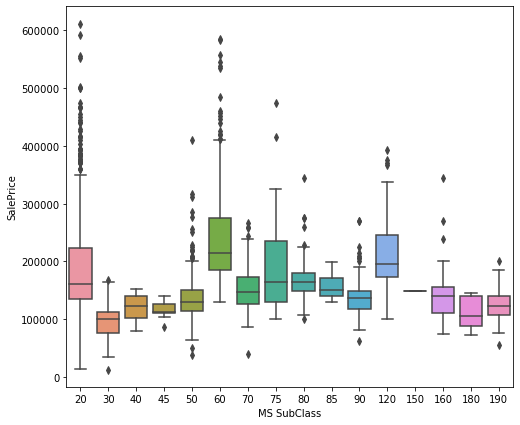

In [2203]:
plt.figure(figsize=(8, 7))
sns.boxplot(x="MS SubClass", y="SalePrice", data=df_train_eda);

#### Observation: (MS SubClass vs. SalePrice)
- Different "MS SubClass" have different median and we see the corresponding "SalePrice" vary differently.
- "MS SubClass" appears to affect "SalePrice" 

### 3.2) MS Zoning (Nominal): Identifies the general zoning classification of the sale.

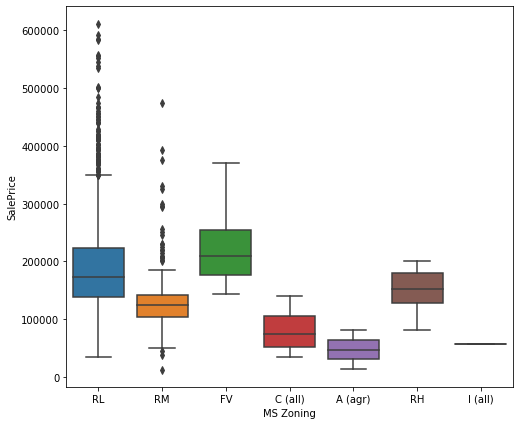

In [2204]:
plt.figure(figsize=(8, 7))
sns.boxplot(x="MS Zoning", y="SalePrice", data=df_train_eda);

#### Observation: (MS Zoning vs. SalePrice)
- Different "MS Zoning" have different median and we see the corresponding "SalePrice" vary differently.
- "MS Zoning" appears to affect "SalePrice" 

### 3.3) Lot Area (Continuous): Lot size in square feet

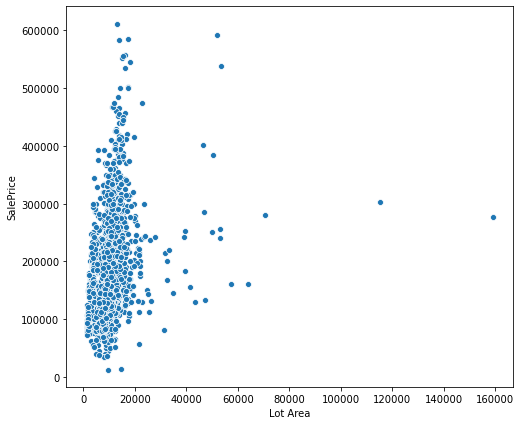

In [2205]:
plt.figure(figsize=(8, 7))
sns.scatterplot(x="Lot Area", y="SalePrice", data=df_train_eda);

In [2206]:
# Using a function to check for correlation between a and b

def eda_correlation(a, b):
    return df_train_eda[a].corr(df_train_eda[b], method='pearson')

In [2207]:
eda_correlation("Lot Area", "SalePrice")

0.29656583236677875

#### Observation: (Lot Area vs. SalePrice)
- There is a weak positive correlation between "Lot Area" and "SalePrice".

### 3.4) Street (Nominal): Type of road access to property

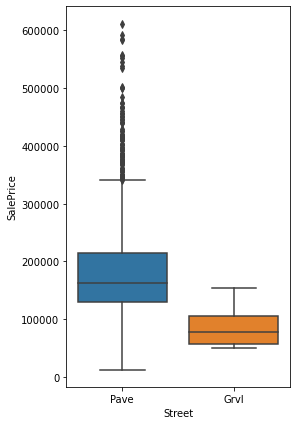

In [2208]:
plt.figure(figsize=(4, 7))
sns.boxplot(x="Street", y="SalePrice", data=df_train_eda);

### 3.5) Alley (Nominal): Type of alley access to property

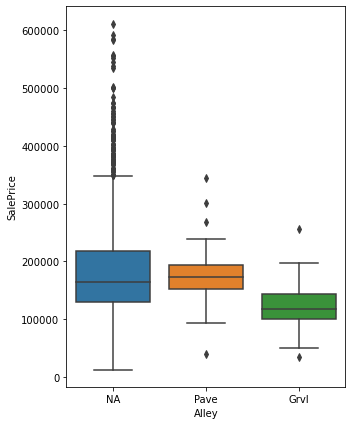

In [2209]:
plt.figure(figsize=(5, 7))
sns.boxplot(x="Alley", y="SalePrice", data=df_train_eda);

In [2210]:
df_train_eda["Alley"].value_counts()

NA      1911
Grvl      85
Pave      55
Name: Alley, dtype: int64

#### Observation: (Alley vs. SalePrice)
- Different "Alley" have different median and we see the corresponding "SalePrice" vary differently.
- For observations with "Alley" feature, it appears to affect "SalePrice".
- However, a high proportion of observations do not have the "Alley" feature.

### 3.6) Lot Shape (Ordinal): General shape of property

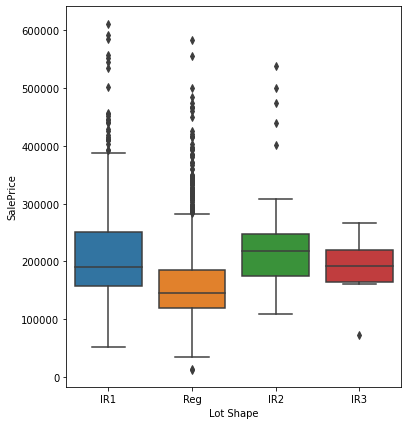

In [2211]:
plt.figure(figsize=(6, 7))
sns.boxplot(x="Lot Shape", y="SalePrice", data=df_train_eda);

#### Observation: (Lot Shape vs. SalePrice)
- Houses with feature - Regular "Lot Shape" appears to fetch a lower "SalePrice" while others with Irregular "Lot Shape" fetch a higher price.

### 3.7) Land Contour (Nominal): Flatness of the property

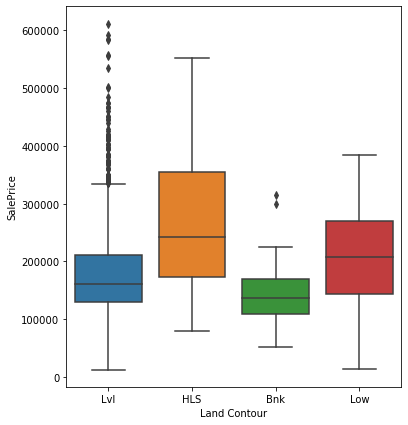

In [2212]:
plt.figure(figsize=(6, 7))
sns.boxplot(x="Land Contour", y="SalePrice", data=df_train_eda);

#### Observation: (Land Contour vs. SalePrice)
- Different "Land Contour" have different median and we see the corresponding "SalePrice" vary differently.
- "Land Contour" appears to affect "SalePrice" 

### 3.8) Utilities (Ordinal): Type of utilities available

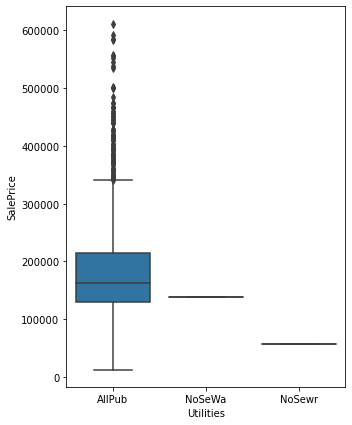

In [2213]:
plt.figure(figsize=(5, 7))
sns.boxplot(x="Utilities", y="SalePrice", data=df_train_eda);

In [2214]:
df_train_eda["Utilities"].value_counts()

AllPub    2049
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

#### Observation: (Utilities vs. SalePrice)
- Almost all houses whose feature "Utilities" use AllPub.
- As almost all houses have the same feature setting, its value to influencing "SalePrice" will be limited.

### 3.9) Lot Config (Nominal): Lot configuration

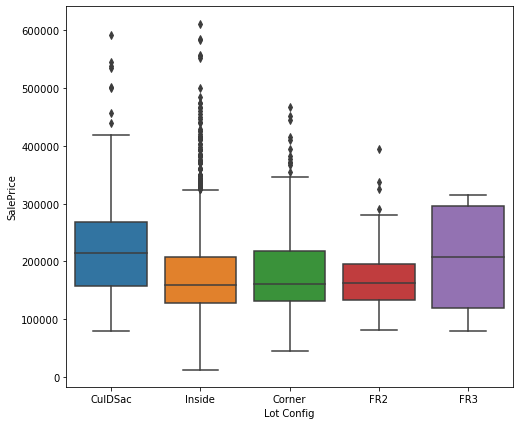

In [2215]:
plt.figure(figsize=(8, 7))
sns.boxplot(x="Lot Config", y="SalePrice", data=df_train_eda);

#### Observation: (Lot Config vs. SalePrice)
- Houses whose feature "Lot Config" are CulSac and FR3 have a higher median and seemed to fetch a higher "SalePrice".

### 3.10) Land Slope (Ordinal): Slope of property

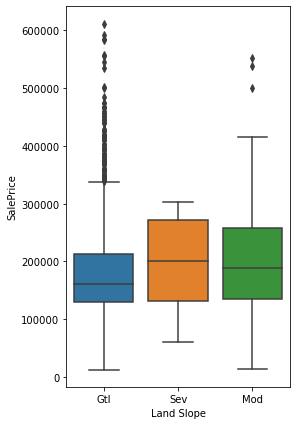

In [2216]:
plt.figure(figsize=(4, 7))
sns.boxplot(x="Land Slope", y="SalePrice", data=df_train_eda);

#### Observation: (Land Slope vs. SalePrice)
- Houses whose feature "Land Slope" are Gtl - Gentle seem to fetch a lower "SalePrice".

### 3.11) Neighborhood (Nominal): Physical locations within Ames city limits

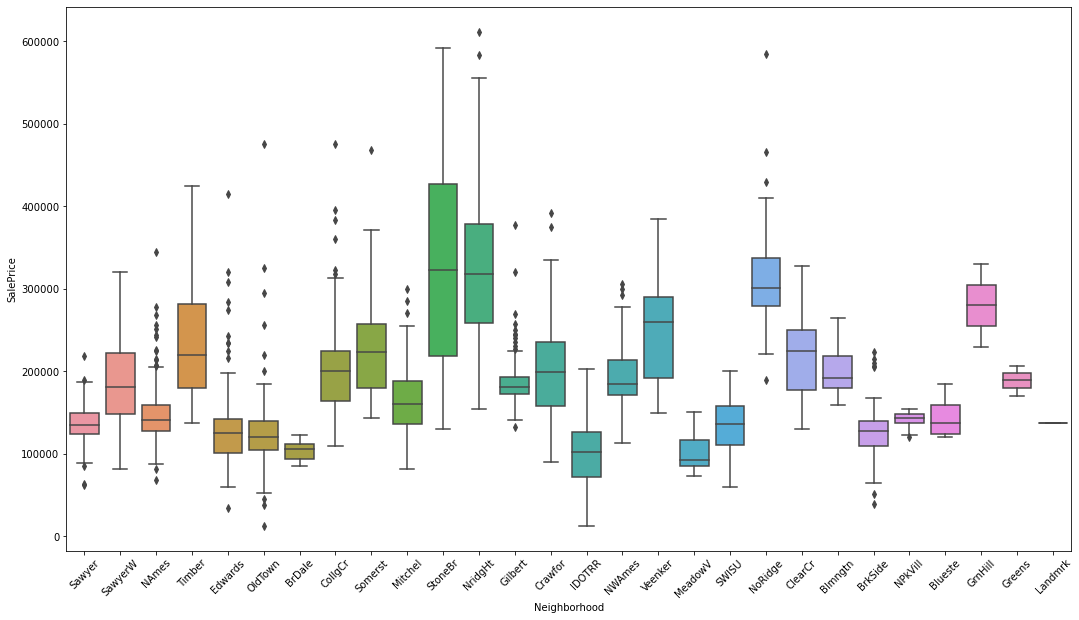

In [2217]:
plt.figure(figsize=(18, 10))
ax = sns.boxplot(x="Neighborhood", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Neighborhood vs. SalePrice)
- Different "Neighborhood" have different median and we see the corresponding "SalePrice" vary differently.
- "Neighborhood" appears to affect "SalePrice" 

## 3.12) Condition 1 (Nominal): Proximity to various conditions

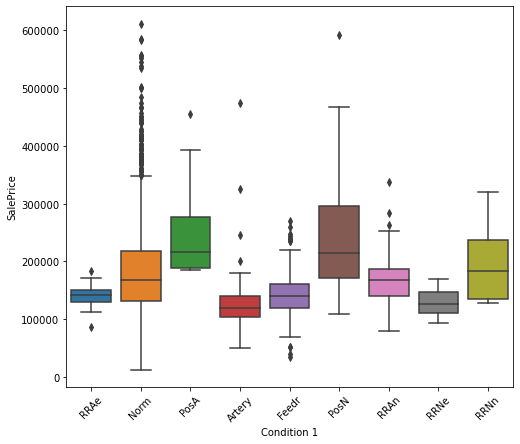

In [2218]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Condition 1", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Neighborhood vs. SalePrice)
- Different "Condition 1" have different median and we see the corresponding "SalePrice" vary differently.
- "Condition 1" appears to affect "SalePrice" 

## 3.13) Condition 2 (Nominal): Proximity to various conditions (if more than one is present)

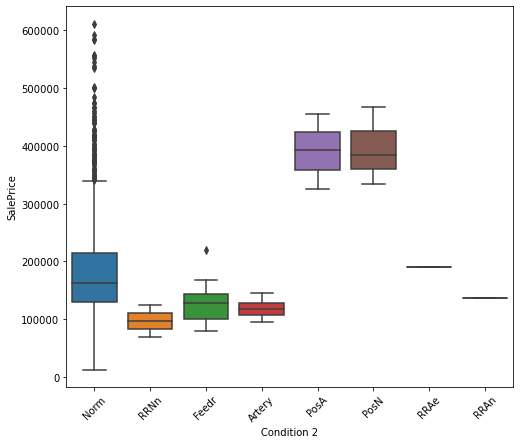

In [2219]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Condition 2", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [2220]:
df_train_eda["Condition 2"].value_counts()

Norm      2025
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: Condition 2, dtype: int64

#### Observation: (Condition 2 vs. SalePrice)
- Different "Condition 2" have different median and we see the corresponding "SalePrice" vary differently.
- "Condition 2" appear to affect "SalePrice" 
- However, most of the observations for the feature "Condition 2" are of the Norm category, so the impact to the "SalePrice" may be limited.

## 3.14) Bldg Type (Nominal): Type of dwelling

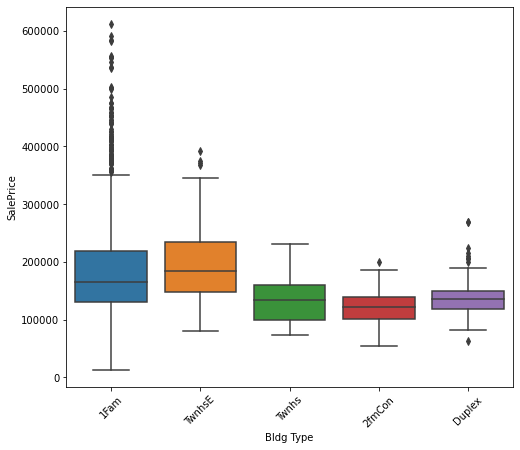

In [2221]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Bldg Type", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Bldg Type vs. SalePrice)
- Different "Bldg Type" have different median and we see the corresponding "SalePrice" vary differently.
- "Bldg Type" appears to affect "SalePrice"

## 3.15) House Style (Nominal): Style of dwelling

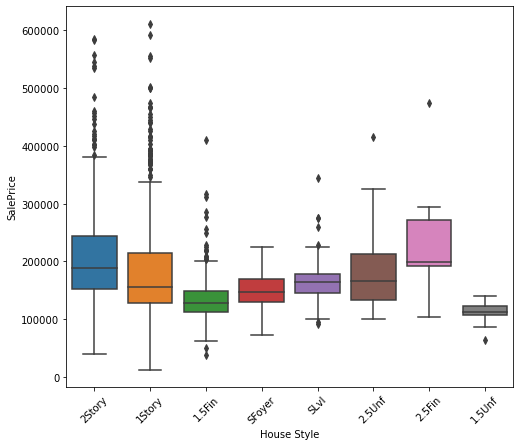

In [2222]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="House Style", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (House Style vs. SalePrice)
- Different "House Style" have different median and we see the corresponding "SalePrice" vary differently.
- "House Style" appears to affect "SalePrice"

## 3.16) Overall Qual (Ordinal): Rates the overall material and finish of the house

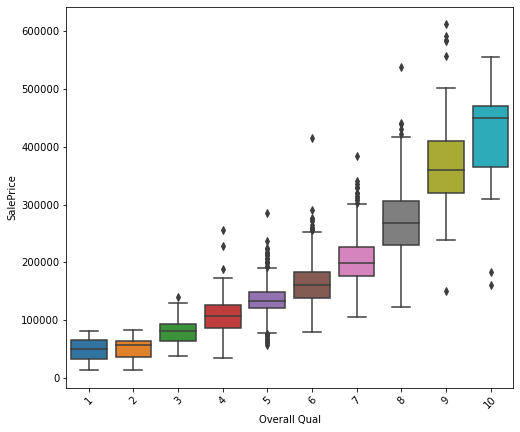

In [2223]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Overall Qual", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [2224]:
eda_correlation("Overall Qual", "SalePrice")

0.8002068702531371

#### Observation: (Overall Qual vs. SalePrice)
- Houses with feature "Overall Qual" that is of a higher level will fetch a higher "SalePrice". 
- "Overall Qual" appear to affect "SalePrice".
- "Overall Qual" correlates positively strongly with "SalePrice".

## 3.17) Overall Cond (Ordinal): Rates the overall condition of the house

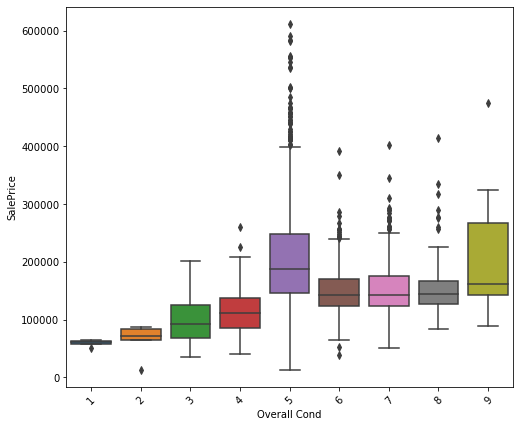

In [2225]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Overall Cond", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [2226]:
eda_correlation("Overall Cond", "SalePrice")

-0.09701891273609116

#### Observation: (Overall Cond vs. SalePrice)
- Different "Overall Cond" have different median and we see the corresponding "SalePrice" vary differently.
- "Overall Cond" appears to affect "SalePrice"

## 3.18) Year Built (Discrete): Original construction date

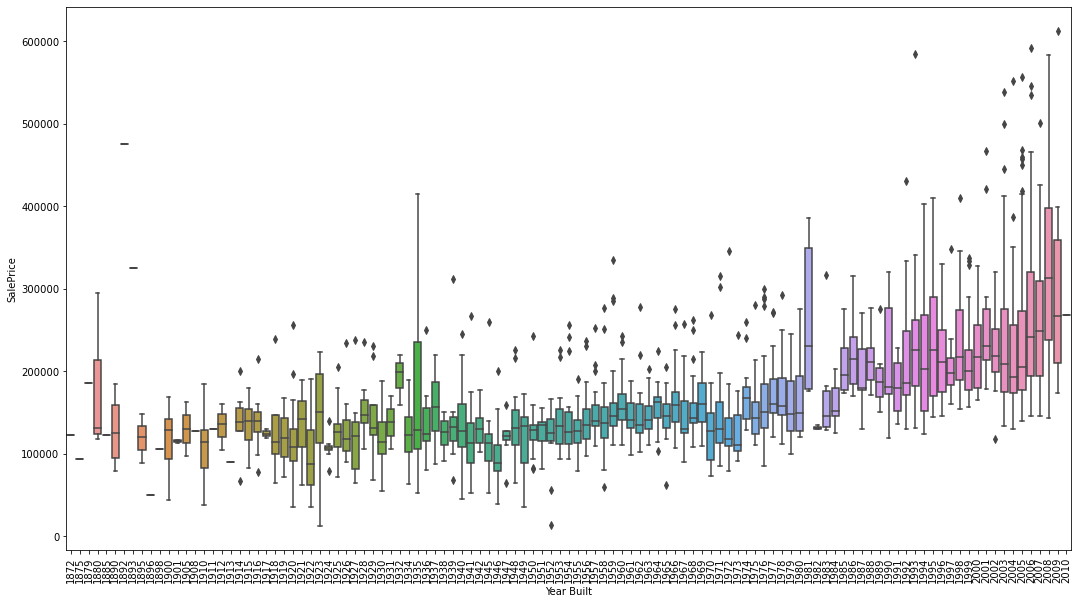

In [2227]:
plt.figure(figsize=(18, 10))
ax = sns.boxplot(x="Year Built", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [2228]:
eda_correlation("Year Built", "SalePrice")

0.5718488959135767

#### Observation: (Year Built vs. SalePrice)
- The later the house is built, the higher the "SalePrice" seems to show.  
- "Year Built" appears to affect "SalePrice"
- "Year Built" correlates positively with "SalePrice"

## 3.19) Year Remod/Add (Discrete): Remodel date

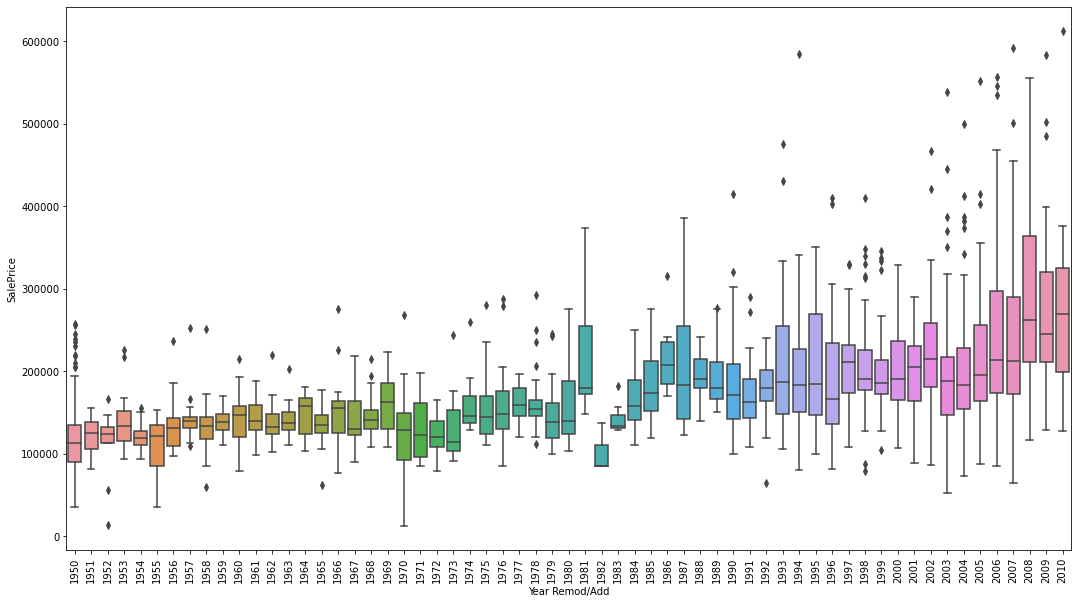

In [2229]:
plt.figure(figsize=(18, 10))
ax = sns.boxplot(x="Year Remod/Add", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [2230]:
eda_correlation("Year Remod/Add", "SalePrice")

0.5503696488195572

#### Observation: (Year Remod/Add vs. SalePrice)
- The later the house is remodeled or added, the higher the "SalePrice" seems to show.  
- "Year Remod/Add" appears to affect "SalePrice"
- "Year Remod/Add" correlates positively with "SalePrice"

## 3.20) Roof Style (Nominal): Type of roof

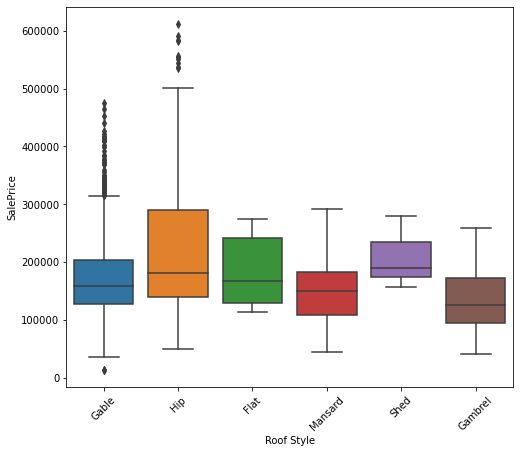

In [2231]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Roof Style", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Roof Style vs. SalePrice)
- Different "Roof Style" have different median and we see the corresponding "SalePrice" vary differently.
- "Roof Style" appears to affect "SalePrice"

## 3.21) Roof Matl (Nominal): Roof material

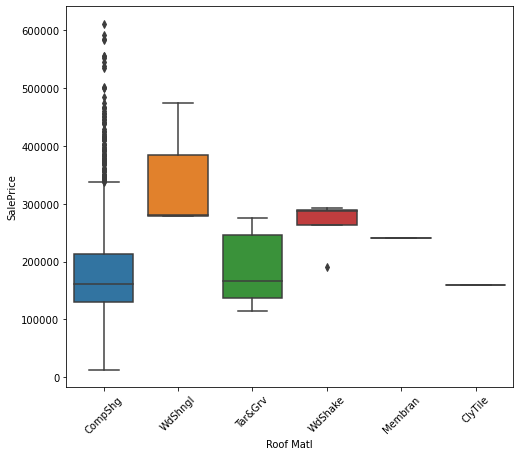

In [2232]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Roof Matl", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [2233]:
df_train_eda["Roof Matl"].value_counts()

CompShg    2025
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
ClyTile       1
Name: Roof Matl, dtype: int64

#### Observation: (Roof Matl vs. SalePrice)
- A large proportion of the observations has feature "Roof Matl" belonging to CompShg. 
- Since most observations share the same feature setting, this feature "Roof Matl" should not have a big impact to "SalePrice".

## 3.22) Exterior 1 (Nominal): Exterior covering on house

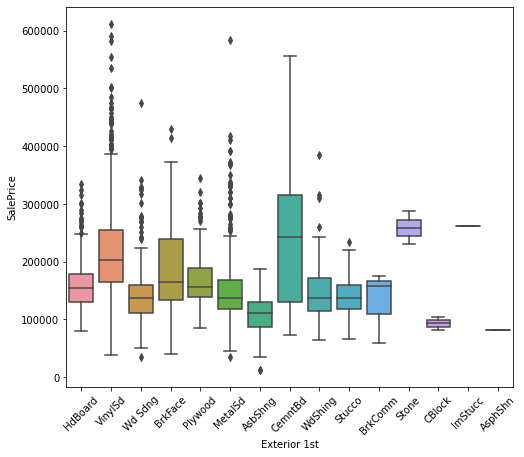

In [2234]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Exterior 1st", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Exterior 1st vs. SalePrice)
- Different "Exterior 1st" have different median and we see the corresponding "SalePrice" vary differently.
- "Exterior 1st" appears to affect "SalePrice"

## 3.23) Exterior 2 (Nominal): Exterior covering on house (if more than one material)

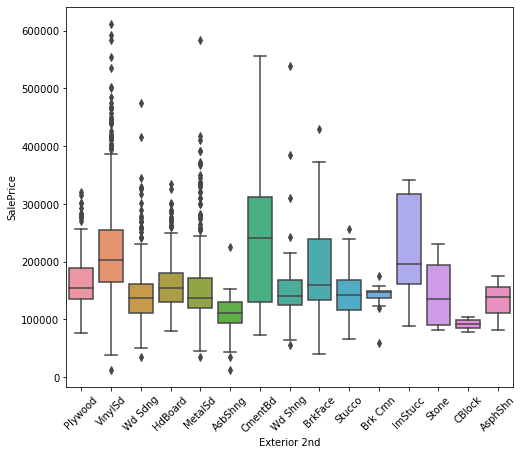

In [2235]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Exterior 2nd", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Exterior 2nd vs. SalePrice)
- Different "Exterior 2nd" have different median and we see the corresponding "SalePrice" vary differently.
- "Exterior 2nd" appears to affect "SalePrice"

## 3.24) Mas Vnr Type (Nominal): Masonry veneer type

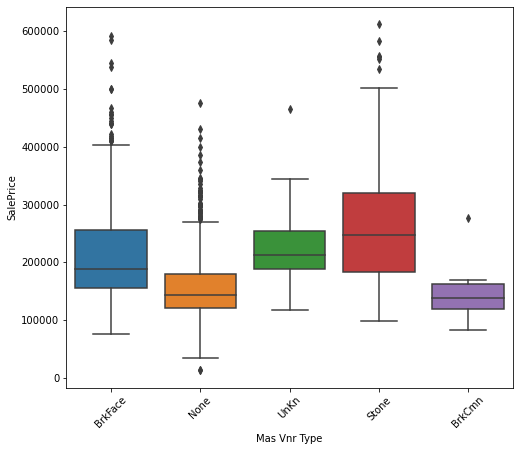

In [2236]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Mas Vnr Type", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Mas Vnr Type vs. SalePrice)
- Different "Mas Vnr Type" have different median and we see the corresponding "SalePrice" vary differently.
- "Mas Vnr Type" appears to affect "SalePrice"

## 3.25) Mas Vnr Area (Continuous): Masonry veneer area in square feet

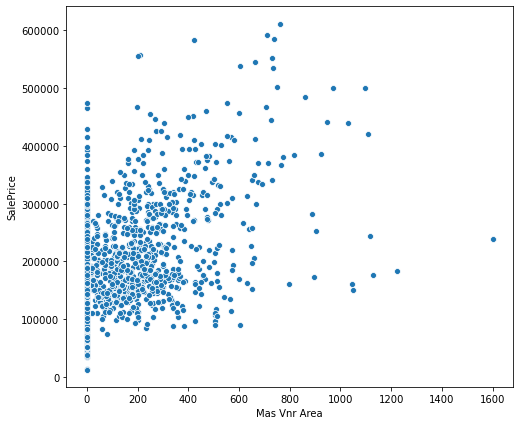

In [2237]:
plt.figure(figsize=(8, 7))
sns.scatterplot(x="Mas Vnr Area", y="SalePrice", data=df_train_eda);

In [2238]:
eda_correlation("Mas Vnr Area", "SalePrice")

0.5035194345529405

#### Observation: (Mas Vnr Area vs. SalePrice)
- "Mas Vnr Area" correlates positively with "SalePrice".
- "Mas Vnr Area" appears to affect "SalePrice"

## 3.26) Exter Qual (Ordinal): Evaluates the quality of the material on the exterior 

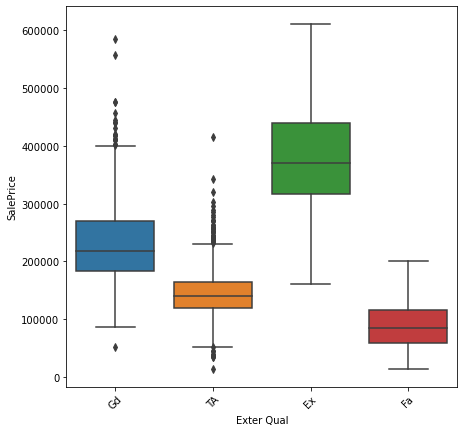

In [2239]:
plt.figure(figsize=(7, 7))
ax = sns.boxplot(x="Exter Qual", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Exter Qual vs. SalePrice)
- Different "Exter Qual" have different median and we see the corresponding "SalePrice" vary differently.
- "Exter Qual" appears to affect "SalePrice"

## 3.27) Exter Cond (Ordinal): Evaluates the present condition of the material on the exterior

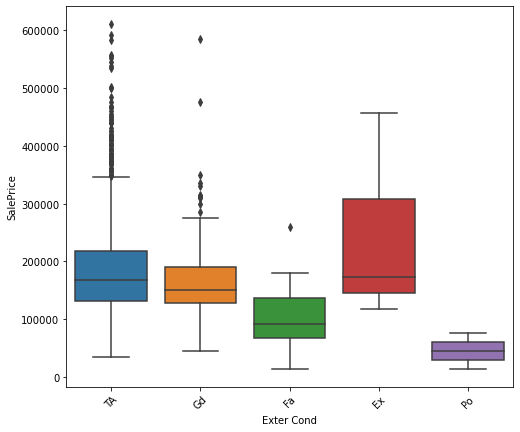

In [2240]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Exter Cond", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Exter Cond vs. SalePrice)
- Different "Exter Cond" have different median and we see the corresponding "SalePrice" vary differently.
- "Exter Cond" appears to affect "SalePrice"

## 3.28) Foundation (Nominal): Type of foundation

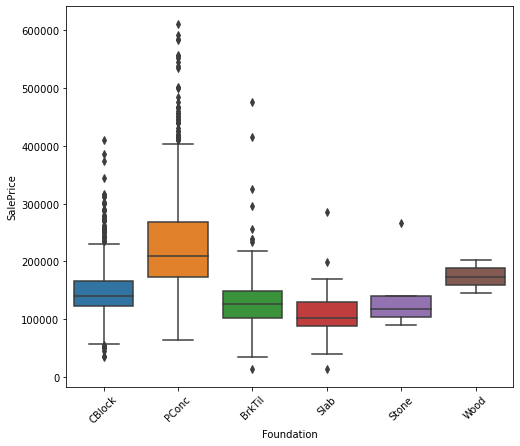

In [2241]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Foundation", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Foundation vs. SalePrice)
- Different "Foundation" have different median and we see the corresponding "SalePrice" vary differently.
- "Foundation" appears to affect "SalePrice"

## 3.29) Bsmt Qual (Ordinal): Evaluates the height of the basement

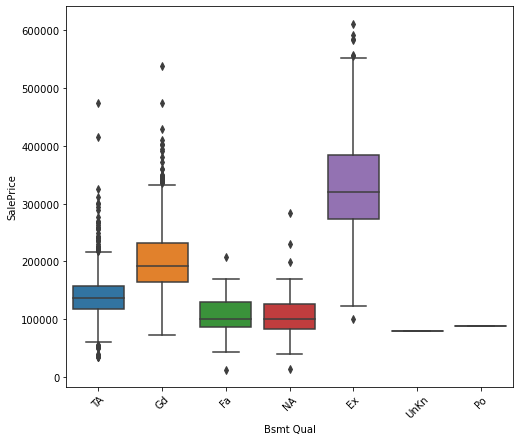

In [2242]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Bsmt Qual", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Bsmt Qual vs. SalePrice)
- Different "Bsmt Qual" have different median and we see the corresponding "SalePrice" vary differently.
- "Bsmt Qual" appears to affect "SalePrice"

## 3.30) Bsmt Cond (Ordinal): Evaluates the general condition of the basement

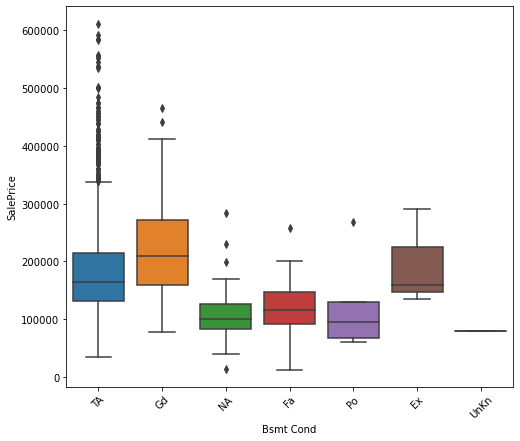

In [2243]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Bsmt Cond", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Bsmt Cond vs. SalePrice)
- Different "Bsmt Cond" have different median and we see the corresponding "SalePrice" vary differently.
- "Bsmt Cond" appears to affect "SalePrice"

## 3.31) Bsmt Exposure	(Ordinal): Refers to walkout or garden level walls

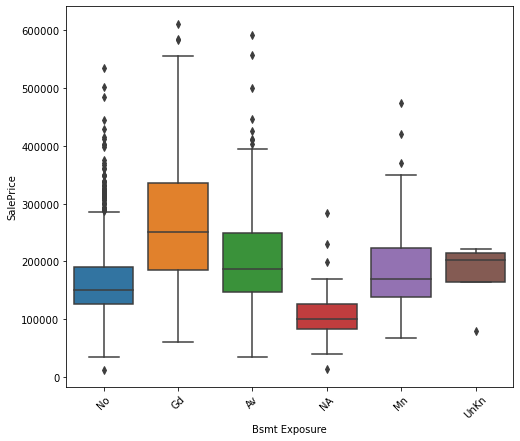

In [2244]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Bsmt Exposure", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Bsmt Exposure vs. SalePrice)
- Different "Bsmt Exposure" have different median and we see the corresponding "SalePrice" vary differently.
- "Bsmt Exposure" appears to affect "SalePrice"

## 3.32) BsmtFin Type 1	(Ordinal): Rating of basement finished area

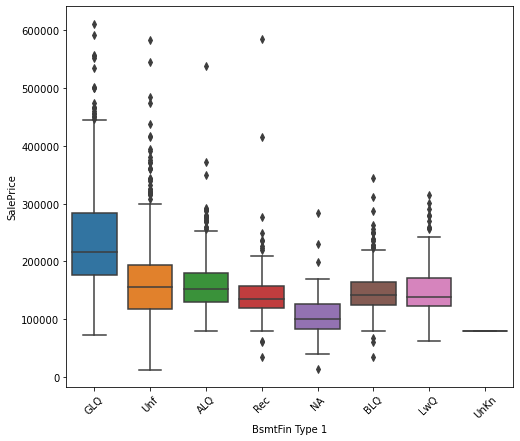

In [2245]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="BsmtFin Type 1", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (BsmtFin Type 1 vs. SalePrice)
- Different "BsmtFin Type 1" have different median and we see the corresponding "SalePrice" vary differently.
- "BsmtFin Type 1" appears to affect "SalePrice"

## 3.33) BsmtFin SF 1 (Continuous): Type 1 finished square feet

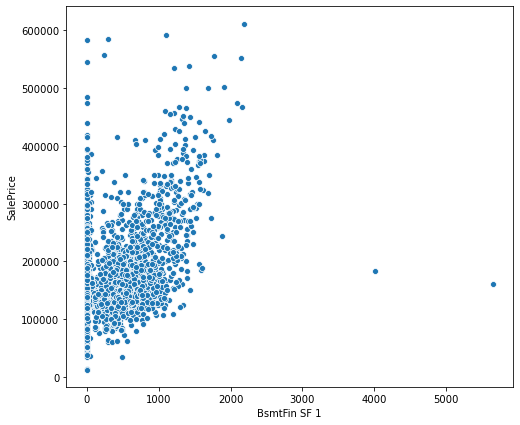

In [2246]:
plt.figure(figsize=(8, 7))
sns.scatterplot(x="BsmtFin SF 1", y="SalePrice", data=df_train_eda);

In [2247]:
eda_correlation("BsmtFin SF 1", "SalePrice")

0.42385685061936523

#### Observation: (BsmtFin SF 1 vs. SalePrice)
- "BsmtFin SF 1" correlates positively moderately with "SalePrice".

## 3.34) BsmtFinType 2	(Ordinal): Rating of basement finished area (if multiple types)

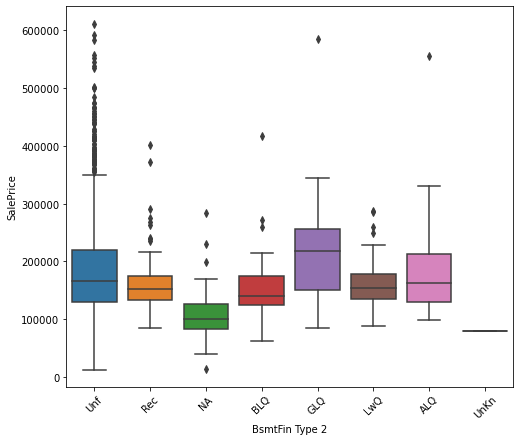

In [2248]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="BsmtFin Type 2", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (BsmtFin Type 2 vs. SalePrice)
- Different "BsmtFin Type 2" have different median and we see the corresponding "SalePrice" vary differently.
- "BsmtFin Type 2" appears to affect "SalePrice"

## 3.35) BsmtFin SF 2 (Continuous): Type 2 finished square feet

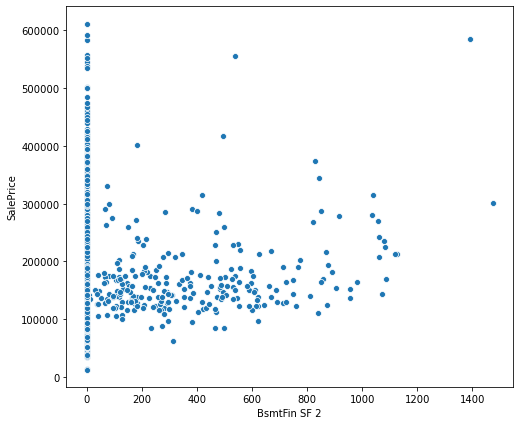

In [2249]:
plt.figure(figsize=(8, 7))
sns.scatterplot(x="BsmtFin SF 2", y="SalePrice", data=df_train_eda);

In [2250]:
eda_correlation("BsmtFin SF 2", "SalePrice")

0.01643550190796741

#### Observation: (BsmtFin SF 2 vs. SalePrice)
- "BsmtFin SF 2" does not seem to have any correlation with "SalePrice".

## 3.36) Bsmt Unf SF (Continuous): Unfinished square feet of basement area

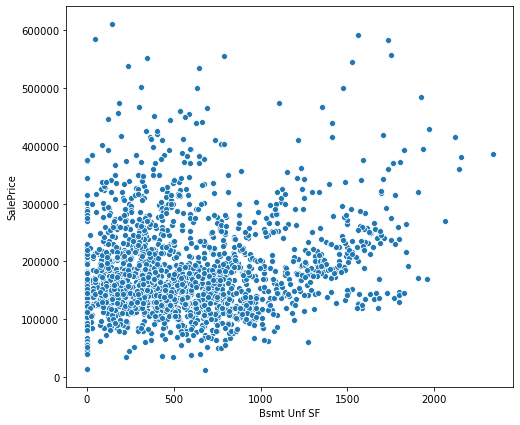

In [2251]:
plt.figure(figsize=(8, 7))
sns.scatterplot(x="Bsmt Unf SF", y="SalePrice", data=df_train_eda);

In [2252]:
eda_correlation("Bsmt Unf SF", "SalePrice")

0.1908623969772017

#### Observation: (Bsmt Unf SF vs. SalePrice)
- "Bsmt Unf SF" has a weak positive correlation with "SalePrice".

## 3.37) Total Bsmt SF (Continuous): Total square feet of basement area

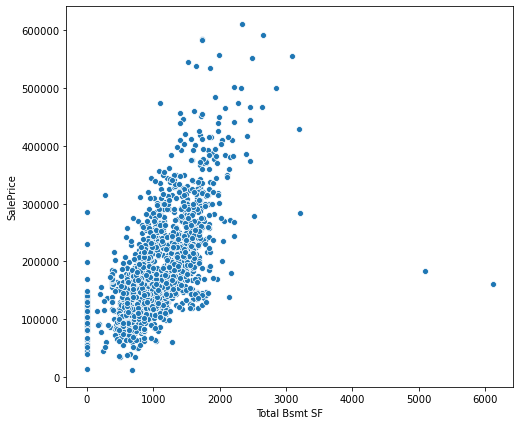

In [2253]:
plt.figure(figsize=(8, 7))
sns.scatterplot(x="Total Bsmt SF", y="SalePrice", data=df_train_eda);

In [2254]:
eda_correlation("Total Bsmt SF", "SalePrice")

0.6293028934953866

#### Observation: (Total Bsmt SF vs. SalePrice)
- "Total Bsmt SF" has a strong positive correlation with "SalePrice".

## 3.38) Heating (Nominal): Type of heating

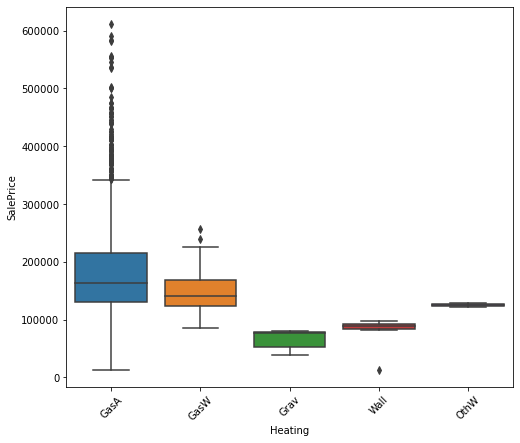

In [2255]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Heating", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [2256]:
df_train_eda["Heating"].value_counts()

GasA    2018
GasW      20
Wall       6
Grav       5
OthW       2
Name: Heating, dtype: int64

#### Observation: (Heating vs. SalePrice)
- Different "Heating" have different median and we see the corresponding "SalePrice" vary differently.
- "Heating" appears to affect "SalePrice"
- However, most houses share the same feature "Heating" category GasA, so this category may have limited effect on "SalePrice".

## 3.39) HeatingQC (Ordinal): Heating quality and condition

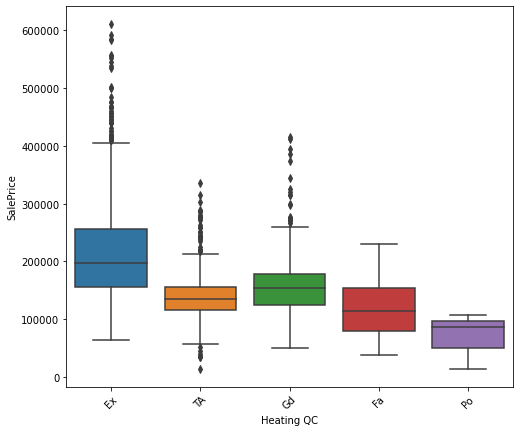

In [2257]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Heating QC", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Heating QC vs. SalePrice)
- Houses with feature "Heating QC" having condition - Ex appears to fetch a higher "SalePrice".

## 3.40) Central Air (Nominal): Central air conditioning

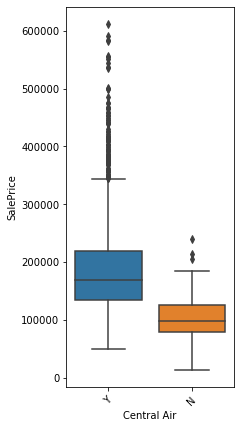

In [2258]:
plt.figure(figsize=(3, 7))
ax = sns.boxplot(x="Central Air", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Heating QC vs. SalePrice)
- Houses with feature "Central Air" equals Yes appears to fetch a higher "SalePrice".

## 3.41) Electrical (Ordinal): Electrical system

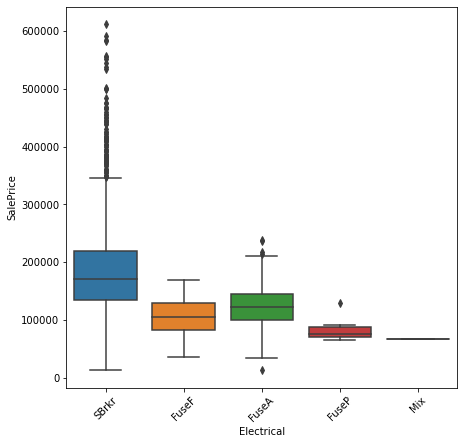

In [2259]:
plt.figure(figsize=(7, 7))
ax = sns.boxplot(x="Electrical", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Electrical vs. SalePrice)
- Different "Electrical" have different median and we see the corresponding "SalePrice" vary differently.
- "Electrical" appears to affect "SalePrice"

## 3.42) 1st Flr SF (Continuous): First Floor square feet

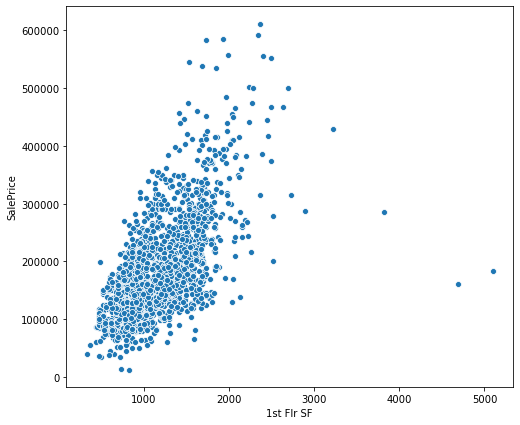

In [2260]:
# 1st Flr SF

plt.figure(figsize=(8, 7))
sns.scatterplot(x="1st Flr SF", y="SalePrice", data=df_train_eda);

In [2261]:
eda_correlation("1st Flr SF", "SalePrice")

0.6184861410533952

#### Observation: (1st Flr SF vs. SalePrice)
- "1st Flr SF" has a moderately strong positive correlation with "SalePrice".

## 3.43) 2nd Flr SF (Continuous) : Second floor square feet

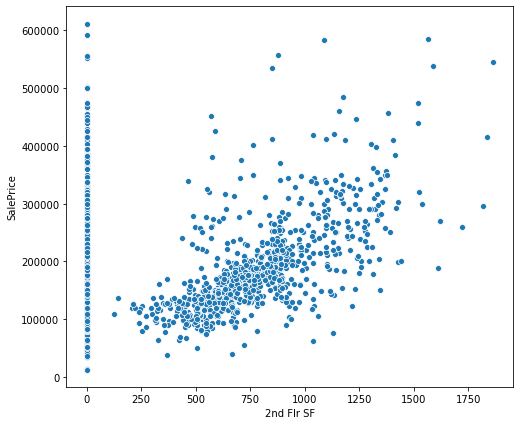

In [2262]:
# 2nd Flr SF

plt.figure(figsize=(8, 7))
sns.scatterplot(x="2nd Flr SF", y="SalePrice", data=df_train_eda);

In [2263]:
eda_correlation("2nd Flr SF", "SalePrice")

0.24845153013114246

#### Observation: (2nd Flr SF vs. SalePrice)
- "2nd Flr SF" has a moderately weak positive correlation with "SalePrice".

## 3.44) Low Qual Fin SF (Continuous): Low quality finished square feet (all floors)

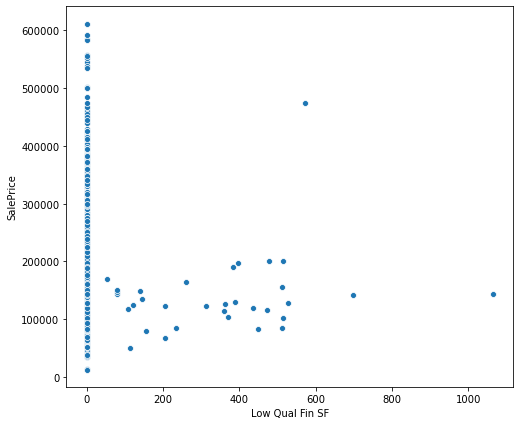

In [2264]:
plt.figure(figsize=(8, 7))
sns.scatterplot(x="Low Qual Fin SF", y="SalePrice", data=df_train_eda);

In [2265]:
eda_correlation("Low Qual Fin SF", "SalePrice")

-0.04159430329864862

#### Observation: (Low Qual Fin SF vs. SalePrice)
- "Low Qual Fin SF" has a very weak correlation with "SalePrice".
- It's effect on "SalePrice" may be very limited. 

## 3.45) Gr Liv Area (Continuous): Above grade (ground) living area square feet

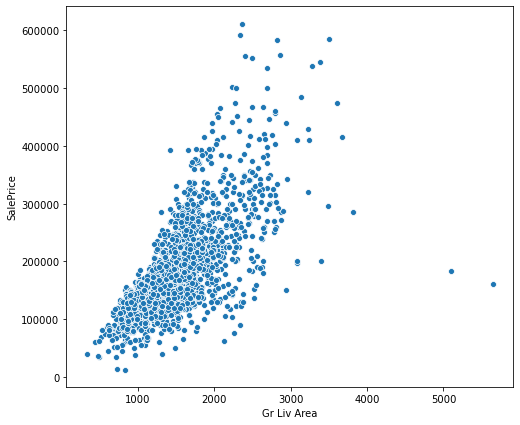

In [2266]:
plt.figure(figsize=(8, 7))
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=df_train_eda);

In [2267]:
eda_correlation("Gr Liv Area", "SalePrice")

0.6970384443056636

#### Observation: (Gr Liv Area vs. SalePrice)
- "Gr Liv Area" has a strong positive correlation with "SalePrice".

## 3.46) Bsmt Full Bath (Discrete): Basement full bathrooms

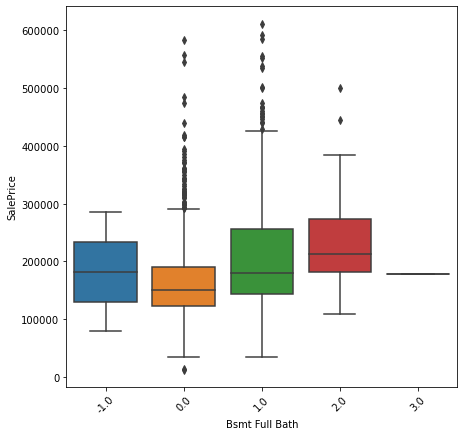

In [2268]:
# Bsmt Full Bath

plt.figure(figsize=(7, 7))
ax = sns.boxplot(x="Bsmt Full Bath", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Bsmt Full Bath vs. SalePrice)
- Different "Bsmt Full Bath" have different median and we see the corresponding "SalePrice" vary differently.
- "Bsmt Full Bath" appears to affect "SalePrice"

## 3.47) Bsmt Half Bath (Discrete): Basement half bathrooms

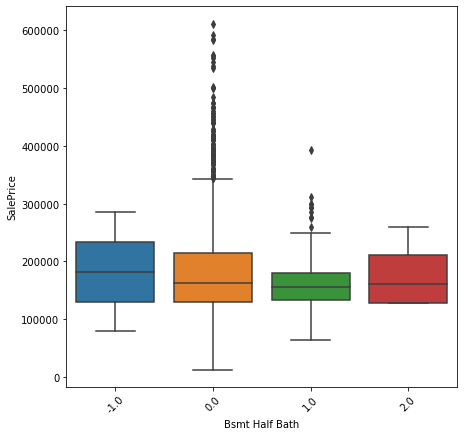

In [2269]:
# Bsmt Half Bath

plt.figure(figsize=(7, 7))
ax = sns.boxplot(x="Bsmt Half Bath", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Bsmt Half Bath vs. SalePrice)
- Different "Bsmt Half Bath" appear to have similar median and we see the corresponding "SalePrice" at approximately the same level.
- "Bsmt Half Bath" appears to have minimal effect on "SalePrice"

## 3.48) Full Bath (Discrete): Full bathrooms above grade

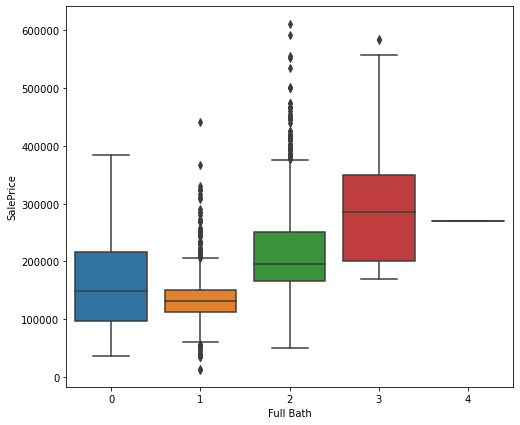

In [2270]:
# Full Bath

plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Full Bath", y="SalePrice", data=df_train_eda)

#### Observation: (Full Bath vs. SalePrice)
- Different "Full Bath" have different median and we see the corresponding "SalePrice" vary differently.
- "Full Bath" appears to affect "SalePrice"

## 3.49) Half Bath (Discrete): Half baths above grade

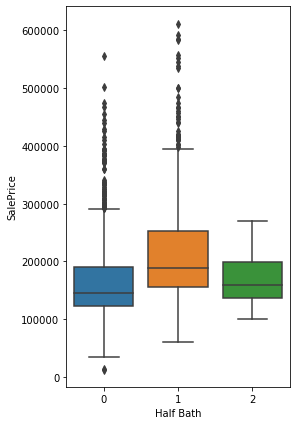

In [2271]:
# Half Bath

plt.figure(figsize=(4, 7))
ax = sns.boxplot(x="Half Bath", y="SalePrice", data=df_train_eda)

#### Observation: (Half Bath vs. SalePrice)
- Different "Half Bath" have different median and we see the corresponding "SalePrice" vary differently.
- "Half Bath" appears to affect "SalePrice"

## 3.50) Bedroom (Discrete): Bedrooms above grade (does NOT include basement bedrooms)

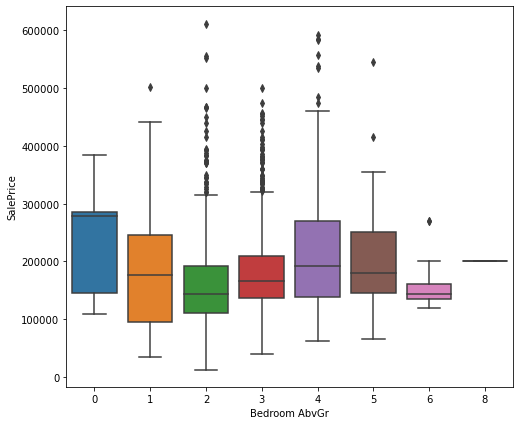

In [2272]:
# Bedroom AbvGr

plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Bedroom AbvGr", y="SalePrice", data=df_train_eda)

#### Observation: (Bedroom AbvGr vs. SalePrice)
- Different "Bedroom AbvGr" have different median and we see the corresponding "SalePrice" vary differently.
- "Bedroom AbvGr" appears to affect "SalePrice"

## 3.51) Kitchen (Discrete): Kitchens above grade

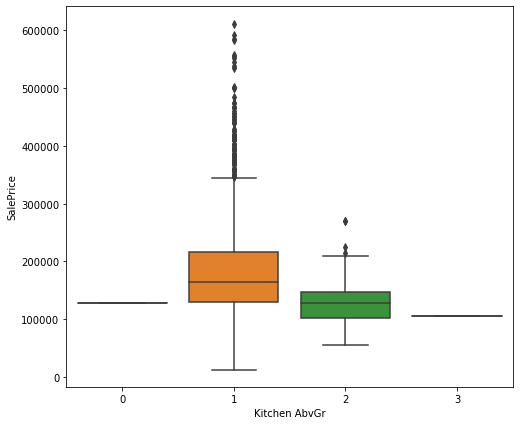

In [2273]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Kitchen AbvGr", y="SalePrice", data=df_train_eda)

#### Observation: (Kitchen AbvGr vs. SalePrice)
- Different "Kitchen AbvGr" have different median and we see the corresponding "SalePrice" vary differently.
- "Kitchen AbvGr" appears to affect "SalePrice"

## 3.52) KitchenQual (Ordinal): Kitchen quality

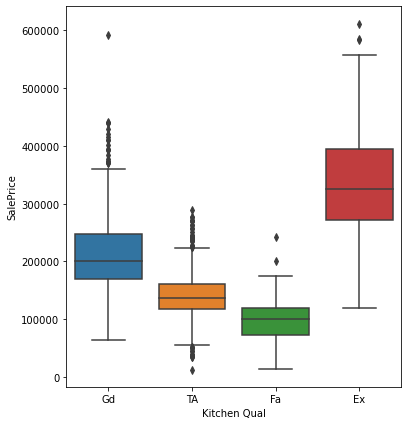

In [2274]:
plt.figure(figsize=(6, 7))
ax = sns.boxplot(x="Kitchen Qual", y="SalePrice", data=df_train_eda)

#### Observation: (Kitchen Qual vs. SalePrice)
- Different "Kitchen Qual" have different median and we see the corresponding "SalePrice" vary differently.
- "Kitchen Qual" appears to affect "SalePrice"

## 3.53) TotRmsAbvGrd	(Discrete): Total rooms above grade (does not include bathrooms)

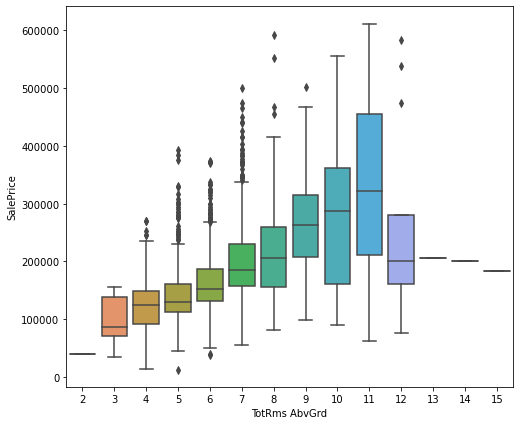

In [2275]:
# TotRms Abv Grd

plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="TotRms AbvGrd", y="SalePrice", data=df_train_eda)

#### Observation: (TotRms AbvGrd vs. SalePrice)
- Different "TotRms AbvGrd" have different median and we see the corresponding "SalePrice" vary differently.
- "TotRms AbvGrd" appears to affect "SalePrice"

## 3.54) Functional (Ordinal): Home functionality (Assume typical unless deductions are warranted)

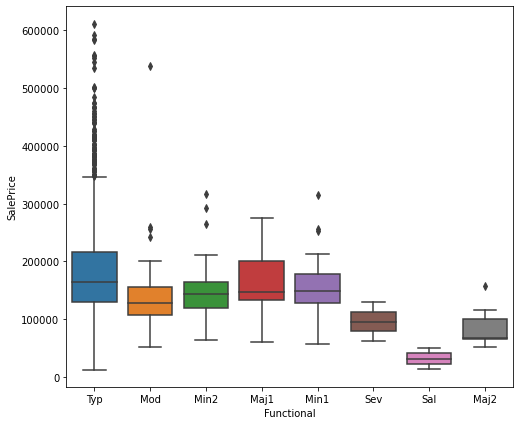

In [2276]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Functional", y="SalePrice", data=df_train_eda)

#### Observation: (Functional vs. SalePrice)
- Different "Functional" have different median and we see the corresponding "SalePrice" vary differently.
- "Functional" appears to affect "SalePrice"

## 3.55) Fireplaces (Discrete): Number of fireplaces

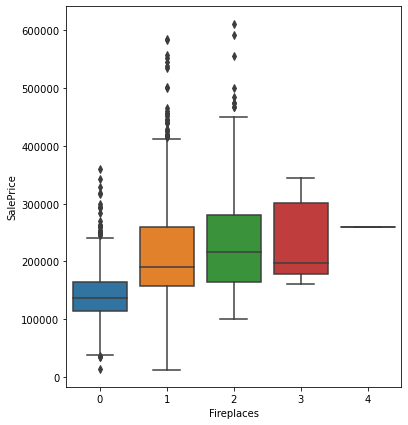

In [2277]:
# Fireplaces

plt.figure(figsize=(6, 7))
ax = sns.boxplot(x="Fireplaces", y="SalePrice", data=df_train_eda)

#### Observation: (Fireplaces vs. SalePrice)
- Different "Fireplaces" have different median and we see the corresponding "SalePrice" vary differently.
- "Fireplaces" appears to affect "SalePrice"

## 3.56) FireplaceQu (Ordinal): Fireplace quality

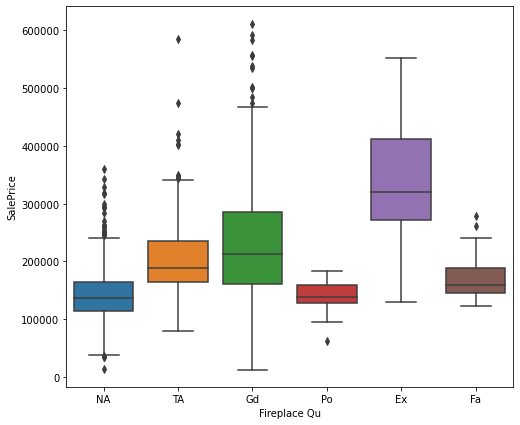

In [2278]:
# Fireplace Qu

plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Fireplace Qu", y="SalePrice", data=df_train_eda)

#### Observation: (Fireplace Qu vs. SalePrice)
- Different "Fireplace Qu" have different median and we see the corresponding "SalePrice" vary differently.
- "Fireplace Qu" appears to affect "SalePrice"

## 3.57) Garage Type (Nominal): Garage location

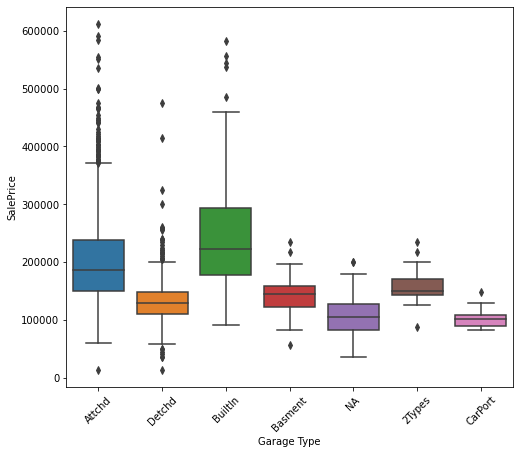

In [2279]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Garage Type", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Garage Type vs. SalePrice)
- Different "Garage Type" have different median and we see the corresponding "SalePrice" vary differently.
- "Garage Type" appears to affect "SalePrice"

## 3.58) Garage Yr Blt (Discrete): Year garage was built

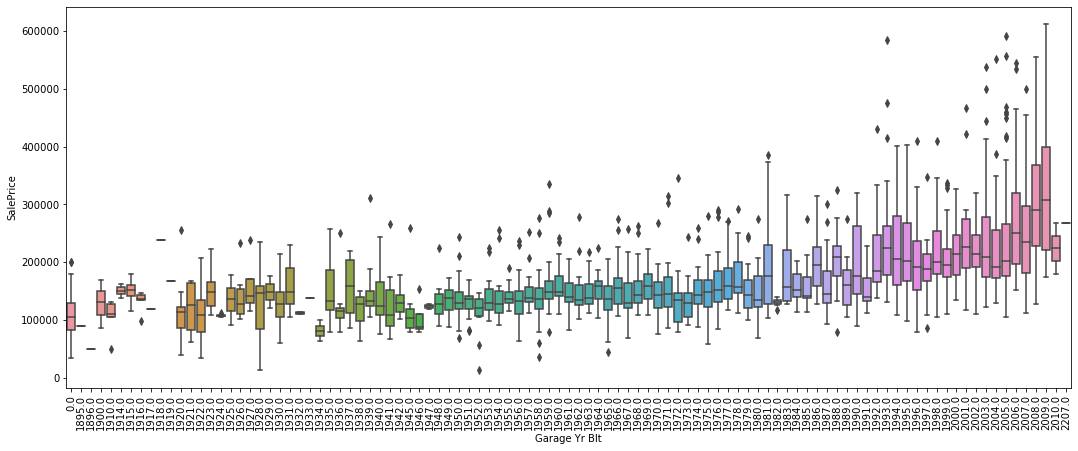

In [2280]:
plt.figure(figsize=(18, 7))
ax = sns.boxplot(x="Garage Yr Blt", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [2281]:
df_train_eda[df_train_eda["Garage Yr Blt"] > 2011.00].filter(regex="Yr")

,Garage Yr Blt,Yr Sold
1699,2207.0,2007


In [2282]:
# Fow row index 1699, since Garage Yr Blt cannot be built in the future (year 2207) and its true value is unknown, 
# we will impute value = 0.0 to correct the errorenous Garage Yr Blt value.

df_train_eda["Garage Yr Blt"].iloc[1699] = 0.0

C:\Users\engso\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


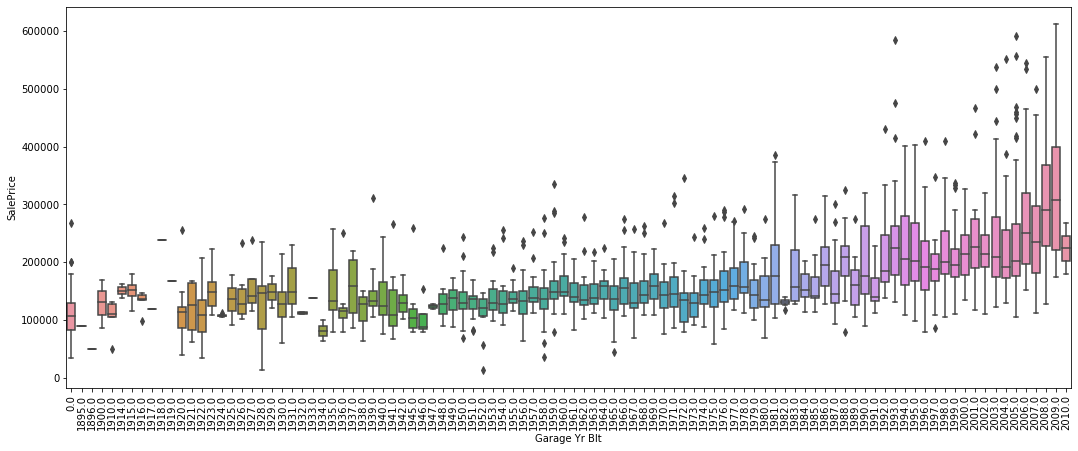

In [2283]:
plt.figure(figsize=(18, 7))
ax = sns.boxplot(x="Garage Yr Blt", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [2284]:
df_train_eda["Garage Yr Blt"].describe()

count    2051.000000
mean     1867.649927
std       455.942847
min         0.000000
25%      1957.000000
50%      1978.000000
75%      2001.000000
max      2010.000000
Name: Garage Yr Blt, dtype: float64

## 3.59) Garage Finish (Ordinal): Interior finish of the garage

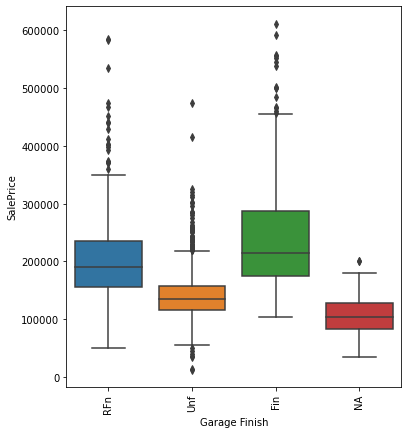

In [2285]:
plt.figure(figsize=(6, 7))
ax = sns.boxplot(x="Garage Finish", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

#### Observation: (Garage Finish vs. SalePrice)
- Different "Garage Finish" have different median and we see the corresponding "SalePrice" vary differently.
- "Garage Finish" appears to affect "SalePrice"

## 3.60) Garage Cars (Discrete): Size of garage in car capacity

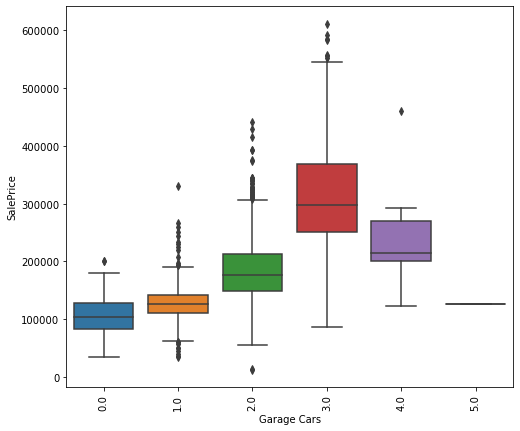

In [2286]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Garage Cars", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

#### Observation: (Garage Cars vs. SalePrice)
- Different "Garage Cars" have different median and we see the corresponding "SalePrice" vary differently.
- "Garage Cars" appears to affect "SalePrice"

## 3.61) Garage Area (Continuous): Size of garage in square feet

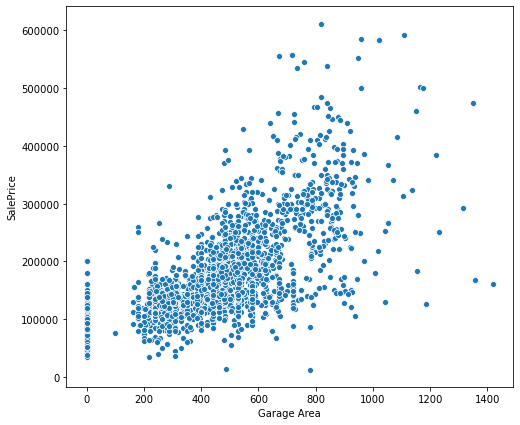

In [2287]:
plt.figure(figsize=(8, 7))
sns.scatterplot(x="Garage Area", y="SalePrice", data=df_train_eda);

In [2288]:
eda_correlation("Garage Area", "SalePrice")

0.6502464186723274

#### Observation: (Garage Area vs. SalePrice)
- "Garage Area" has a strong positive correlation with "SalePrice".

## 3.62) Garage Qual (Ordinal): Garage quality

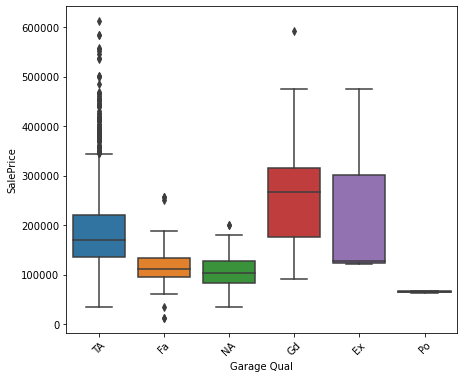

In [2289]:
plt.figure(figsize=(7, 6))
ax = sns.boxplot(x="Garage Qual", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Garage Qual vs. SalePrice)
- Different "Garage Qual" have different median and we see the corresponding "SalePrice" vary differently.
- "Garage Qual" appears to affect "SalePrice"

## 3.63) Garage Cond (Ordinal): Garage condition

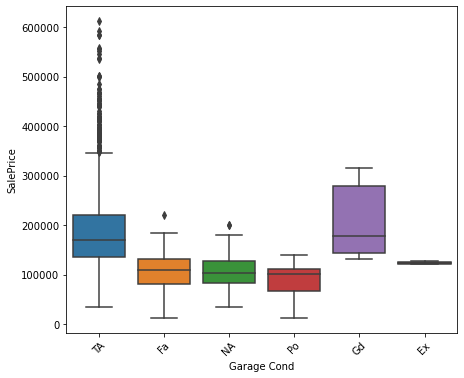

In [2290]:
plt.figure(figsize=(7, 6))
ax = sns.boxplot(x="Garage Cond", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Garage Cond vs. SalePrice)
- Different "Garage Cond" have different median and we see the corresponding "SalePrice" vary differently.
- "Garage Cond" appears to affect "SalePrice"

## 3.64) Paved Drive (Ordinal): Paved driveway

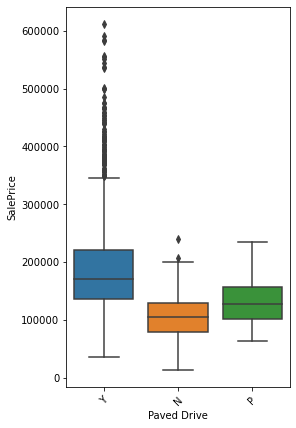

In [2291]:
plt.figure(figsize=(4, 7))
ax = sns.boxplot(x="Paved Drive", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Paved Drive vs. SalePrice)
- Different "Paved Drive" have different median and we see the corresponding "SalePrice" vary differently.
- "Paved Drive" appears to affect "SalePrice"

## 3.65) Wood Deck SF (Continuous): Wood deck area in square feet

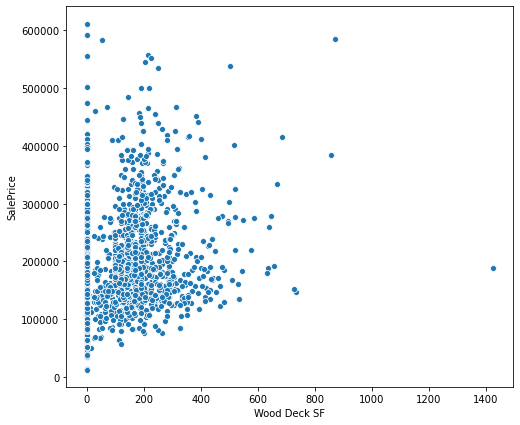

In [2292]:
plt.figure(figsize=(8, 7))
sns.scatterplot(x="Wood Deck SF", y="SalePrice", data=df_train_eda);

In [2293]:
eda_correlation("Wood Deck SF", "SalePrice")

0.32648970218965695

#### Observation: (Wood Deck SF vs. SalePrice)
- "Wood Deck SF" has a weak positive correlation with "SalePrice".

## 3.66) Open Porch SF (Continuous): Open porch area in square feet

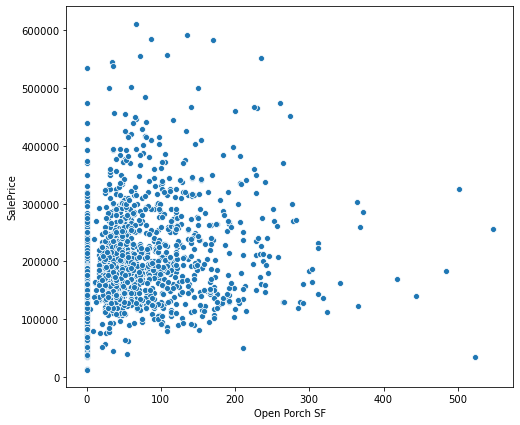

In [2294]:
plt.figure(figsize=(8, 7))
sns.scatterplot(x="Open Porch SF", y="SalePrice", data=df_train_eda);

In [2295]:
eda_correlation("Open Porch SF", "SalePrice")

0.33347602979205543

#### Observation: (Open Porch SF vs. SalePrice)
- "Open Porch SF" has a weak positive correlation with "SalePrice".

## 3.67) Enclosed Porch (Continuous): Enclosed porch area in square feet

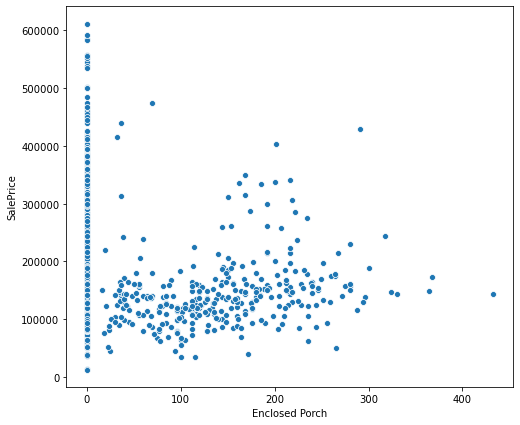

In [2296]:
plt.figure(figsize=(8, 7))
sns.scatterplot(x="Enclosed Porch", y="SalePrice", data=df_train_eda);

In [2297]:
eda_correlation("Enclosed Porch", "SalePrice")

-0.13565649182472145

#### Observation: (Enclosed Porch vs. SalePrice)
- "Enclosed Porch" has a weak negative correlation with "SalePrice".

## 3.68) 3-Ssn Porch (Continuous): Three season porch area in square feet

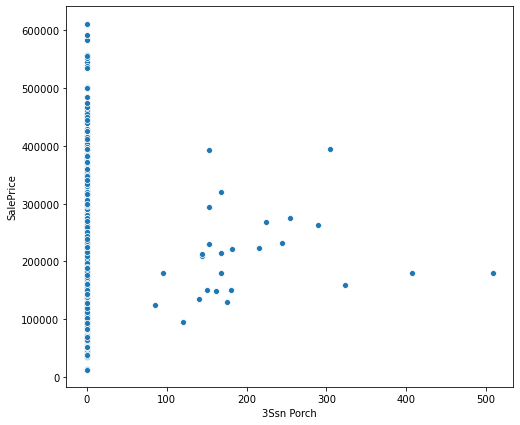

In [2298]:
plt.figure(figsize=(8, 7))
sns.scatterplot(x="3Ssn Porch", y="SalePrice", data=df_train_eda);

In [2299]:
eda_correlation("3Ssn Porch", "SalePrice")

0.04873185398349626

#### Observation: (3Ssn Porch vs. SalePrice)
- "3Ssn Porch" has a weak positive correlation with "SalePrice".
-  The feature "3Ssn Porch" will have limited effect on the "SalePrice".

## 3.69) Screen Porch (Continuous): Screen porch area in square feet

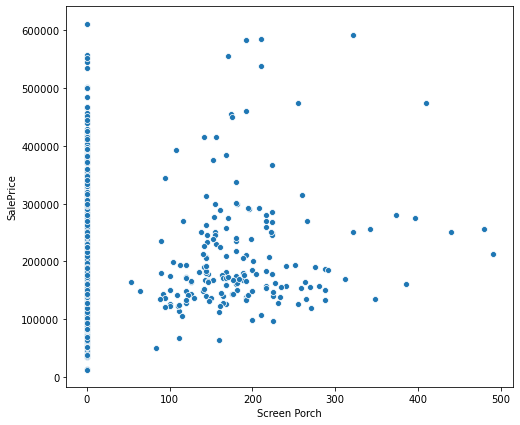

In [2300]:
plt.figure(figsize=(8, 7))
sns.scatterplot(x="Screen Porch", y="SalePrice", data=df_train_eda);

In [2301]:
eda_correlation("Screen Porch", "SalePrice")

0.13458135196225804

#### Observation: (Screen Porch vs. SalePrice)
- "Screen Porch" has a weak positive correlation with "SalePrice".
-  The feature "Screen Porch" will have limited effect on the "SalePrice".

## 3.70) Pool Area (Continuous): Pool area in square feet

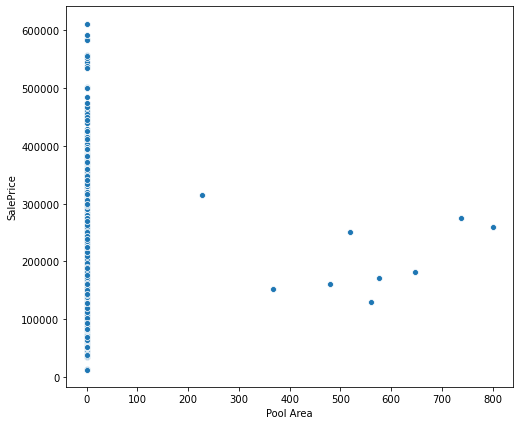

In [2302]:
plt.figure(figsize=(8, 7))
sns.scatterplot(x="Pool Area", y="SalePrice", data=df_train_eda);

In [2303]:
eda_correlation("Pool Area", "SalePrice")

0.02310631715788679

#### Observation: (Pool Area vs. SalePrice)
- "Pool Area" has a weak positive correlation with "SalePrice".
-  The feature "Pool Area" will have limited effect on the "SalePrice".

## 3.71) Pool QC (Ordinal): Pool quality

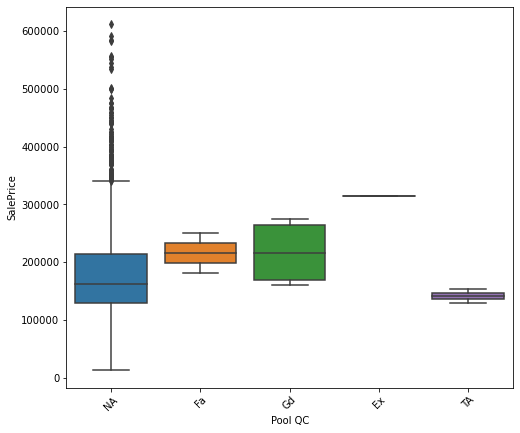

In [2304]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Pool QC", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [2305]:
df_train_eda["Pool QC"].value_counts()

NA    2042
Gd       4
Fa       2
TA       2
Ex       1
Name: Pool QC, dtype: int64

#### Observation: (Pool QC vs. SalePrice)
- Different "Pool QC" have different median and we see the corresponding "SalePrice" vary differently.
- "Pool QC" appears to affect "SalePrice"
- However, as most of the feature "Pool QC" are of the same category - NA, this feature will have limited effect on the "SalePrice".

## 3.72) Fence (Ordinal): Fence quality

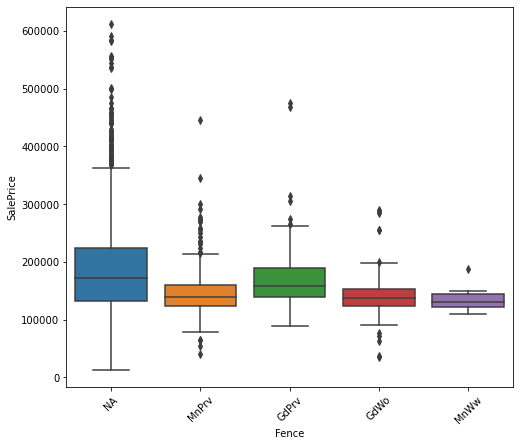

In [2306]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Fence", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Fence vs. SalePrice)
- Different "Fence" have similar median and we see the corresponding "SalePrice" vary at about the same level.
- "Fence" seems to have limited effect on "SalePrice"

## 3.73) Misc Feature (Nominal): Miscellaneous feature not covered in other categories

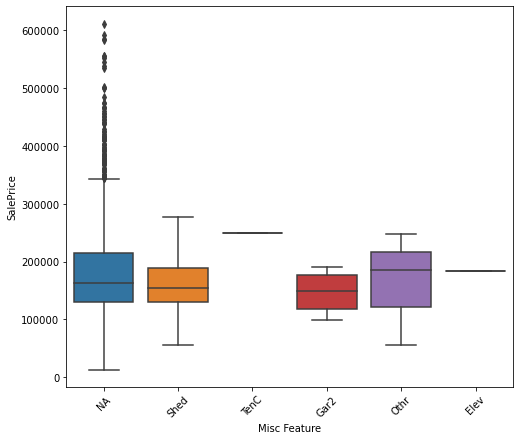

In [2307]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Misc Feature", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Misc Feature vs. SalePrice)
- Different "Misc Feature" have similar median and we see the corresponding "SalePrice" vary at about the same level.
- "Misc Feature" seems to have limited effect on "SalePrice"

## 3.74) Misc Val (Continuous): Dollar Value of miscellaneous feature

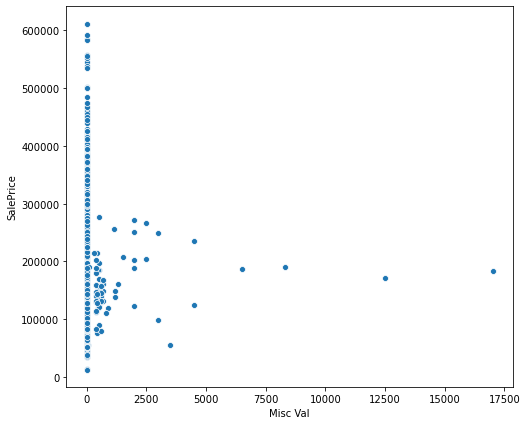

In [2308]:
plt.figure(figsize=(8, 7))
sns.scatterplot(x="Misc Val", y="SalePrice", data=df_train_eda);

In [2309]:
eda_correlation("Misc Val", "SalePrice")

-0.007374759586406782

#### Observation: (Misc Val vs. SalePrice)
- "Misc Val" has a weak negative correlation with "SalePrice".
-  The feature "Misc Val" will have limited effect on the "SalePrice".

## 3.75) Mo Sold (Discrete): Month Sold (MM)

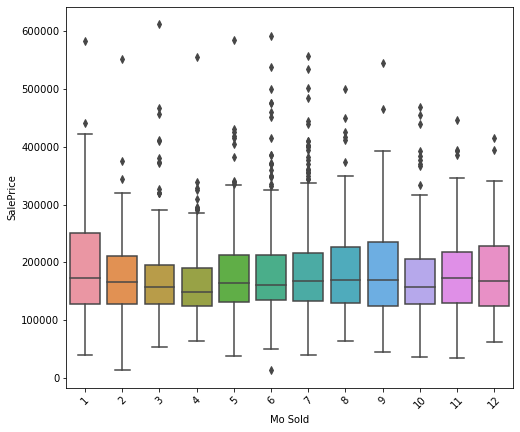

In [2310]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Mo Sold", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Mo Sold vs. SalePrice)
- Different "Mo Sold" have similar median and we see the corresponding "SalePrice" vary at about the same level.
- "Mo Sold" seems to have limited effect on "SalePrice"

## 3.76) Yr Sold (Discrete): Year Sold (YYYY)

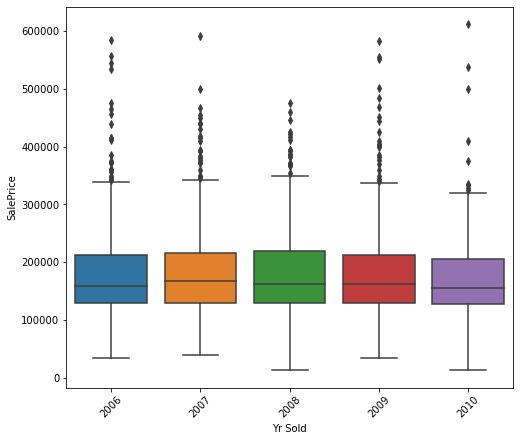

In [2311]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Yr Sold", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Yr Sold vs. SalePrice)
- Different "Yr Sold" have similar median and we see the corresponding "SalePrice" vary at about the same level.
- "Yr Sold" seems to have limited effect on "SalePrice"

## 3.77) Sale Type (Nominal): Type of sale

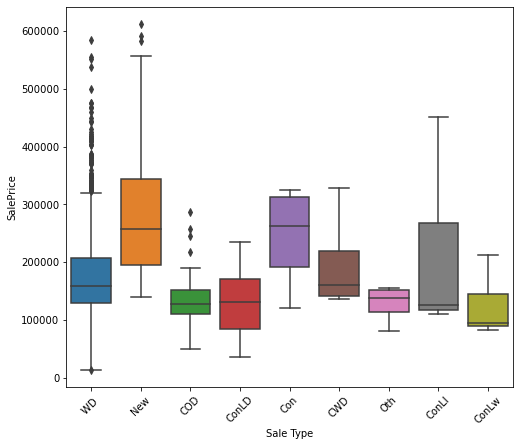

In [2312]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Sale Type", y="SalePrice", data=df_train_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observation: (Sale Type vs. SalePrice)
- Different "Sale Type" have different median and we see the corresponding "SalePrice" vary differently.
- "Sale Type" appears to affect "SalePrice"

## 3.78) SalePrice (Continuous): Sale price in Dollars

Skewness is 1.5575514385863427


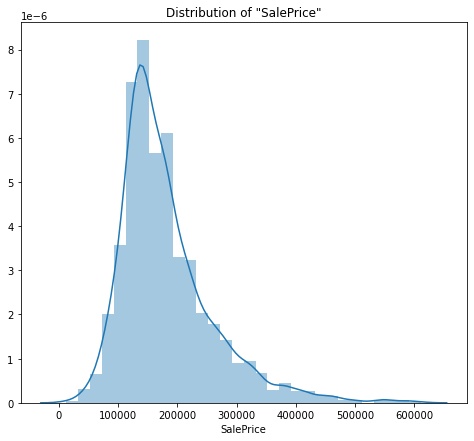

In [2313]:
plt.figure(figsize=(8, 7))
target1 = df_train_eda['SalePrice']
print ('Skewness is', target1.skew()) # Positive skewness, or right skew
ax1 = sns.distplot(target1, bins=30, kde = True).set_title('Distribution of "SalePrice"');

Skewness is -0.14681576272177396


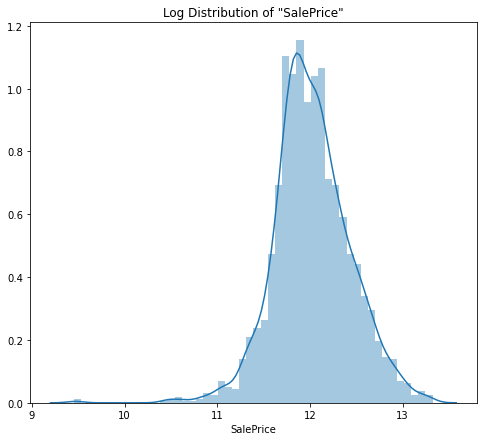

In [2314]:
plt.figure(figsize=(8, 7))
target2 = np.log(df_train_eda['SalePrice'])
print ('Skewness is', target2.skew()) # Negative skewness, or left skew
ax2 = sns.distplot(target2).set_title('Log Distribution of "SalePrice"');

### Observation: "SalePrice"
- A normal distribution has zero skewness. Log of "SalePrice" has improved the negative skewness closer to a normal distribution.

In [2315]:
# Saving the train - clean and EDA dataset

df_train_eda.to_csv("./datasets/train_clean_eda.csv", index=False)

In [2316]:
# Saving the test - clean and EDA dataset

df_test_eda.to_csv("./datasets/test_clean_eda.csv", index=False)

#### Graphes to be used for presentation slides

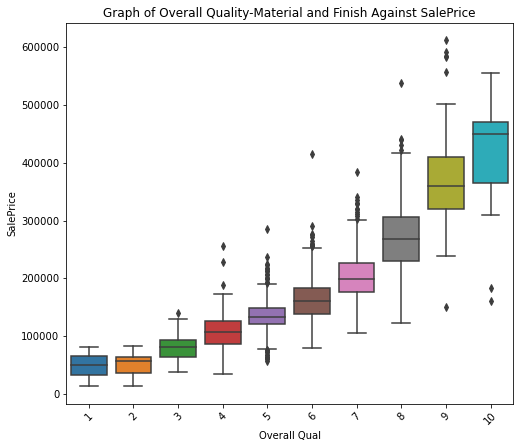

In [2317]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Overall Qual", y="SalePrice", data=df_train_eda)
ax.set_title('Graph of Overall Quality-Material and Finish Against SalePrice')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Text(0.5, 1.0, 'Graph of Kitchen Quality Against SalePrice')

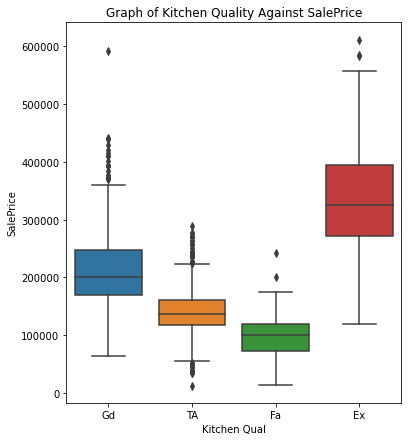

In [2318]:
plt.figure(figsize=(6, 7))
ax = sns.boxplot(x="Kitchen Qual", y="SalePrice", data=df_train_eda)
ax.set_title('Graph of Kitchen Quality Against SalePrice')

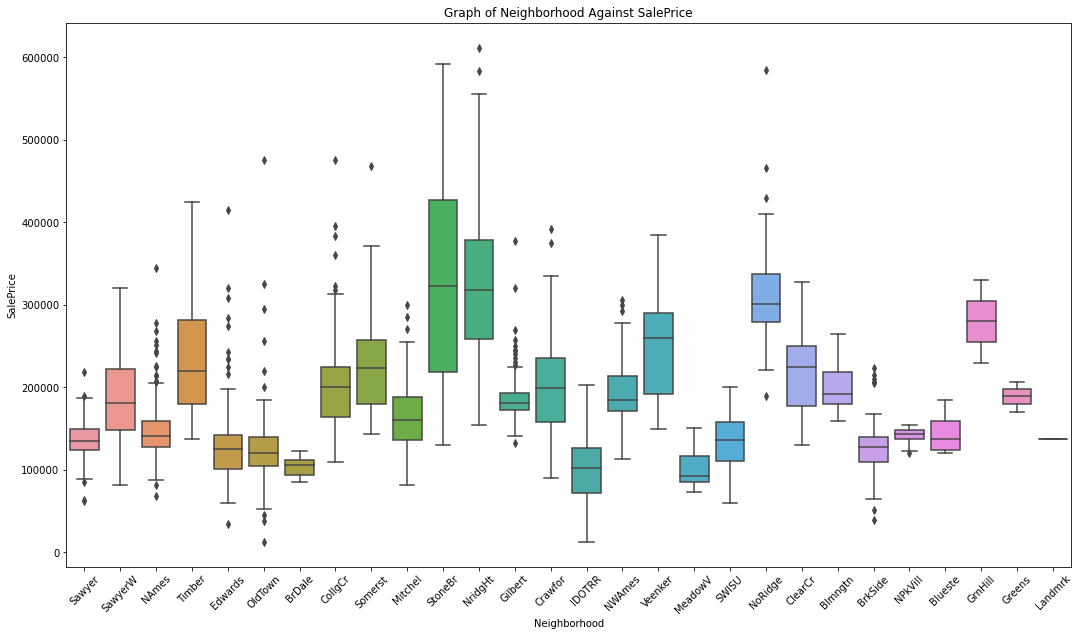

In [2319]:
plt.figure(figsize=(18, 10))
ax = sns.boxplot(x="Neighborhood", y="SalePrice", data=df_train_eda)
ax.set_title('Graph of Neighborhood Against SalePrice')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

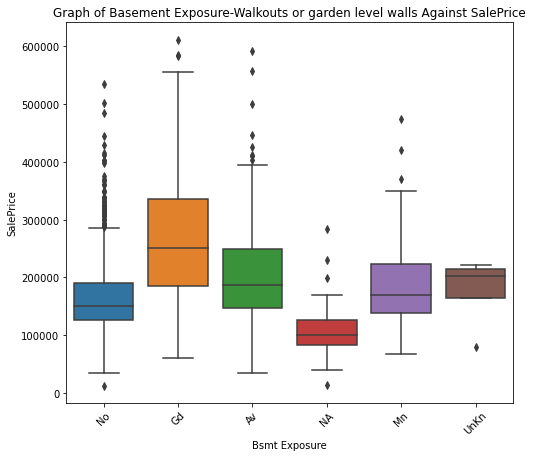

In [2320]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Bsmt Exposure", y="SalePrice", data=df_train_eda)
ax.set_title('Graph of Basement Exposure-Walkouts or garden level walls Against SalePrice')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

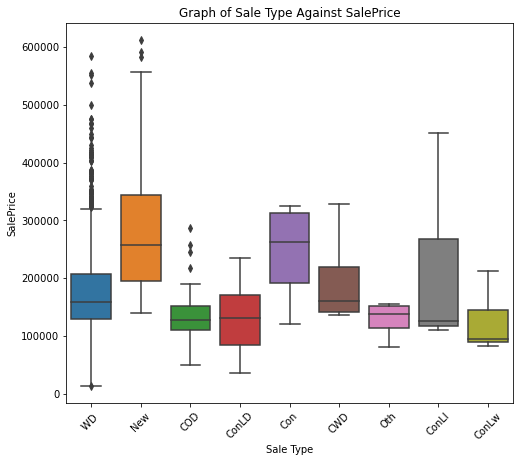

In [2321]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Sale Type", y="SalePrice", data=df_train_eda)
ax.set_title('Graph of Sale Type Against SalePrice')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

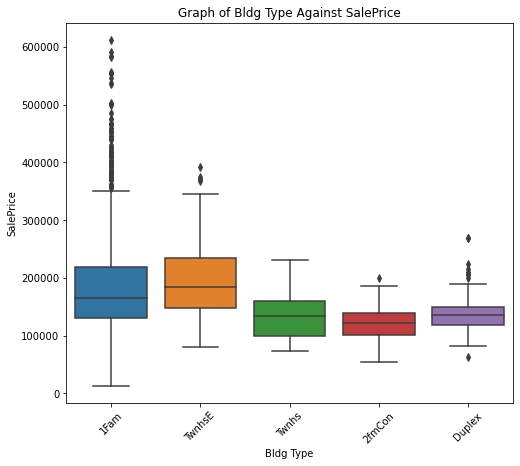

In [2322]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Bldg Type", y="SalePrice", data=df_train_eda)
ax.set_title('Graph of Bldg Type Against SalePrice')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

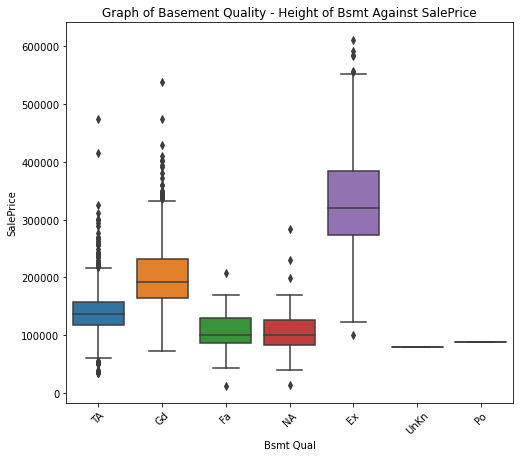

In [2323]:
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x="Bsmt Qual", y="SalePrice", data=df_train_eda)
ax.set_title('Graph of Basement Quality - Height of Bsmt Against SalePrice')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);